In [1]:
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter (action = 'ignore')
# plt.style.use ('seaborn')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv ("Health index copy.csv")
data

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
462        15     227        3   60   853         3      84           0   28   
463        15     334        3   64   622         3     108           0   12   
464        15    1280        2  675  2530         0       0           0    8   
465        15     169        5   77   532         0      72           0   11   
466        15     308        3   64   581         5      27           0   18   

     Health_index  Life_expectation  
0            95.2              19.0  
1            85.5              19.0  
2            85.3              19.0  
3            85.3               6.0  
4            85.2               6.0  
..            ...               ...  
462          13.4              51.0  
463          13.4              51.0  
464          13.4               6.5  
465          13.4              51.0  
466          13.4              51.0  

[467 rows x 11 columns]

In [3]:
df = pd.DataFrame (data)
df

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
462        15     227        3   60   853         3      84           0   28   
463        15     334        3   64   622         3     108           0   12   
464        15    1280        2  675  2530         0       0           0    8   
465        15     169        5   77   532         0      72           0   11   
466        15     308        3   64   581         5      27           0   18   

     Health_index  Life_expectation  
0            95.2              19.0  
1            85.5              19.0  
2            85.3              19.0  
3            85.3               6.0  
4            85.2               6.0  
..            ...               ...  
462          13.4              51.0  
463          13.4              51.0  
464          13.4               6.5  
465          13.4              51.0  
466          13.4              51.0  

[467 rows x 11 columns]

In [4]:
df.shape

(467, 11)

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hydrogen          467 non-null    int64  
 1   Oxigen            467 non-null    int64  
 2   Methane           467 non-null    int64  
 3   CO                467 non-null    int64  
 4   CO2               467 non-null    int64  
 5   Ethylene          467 non-null    int64  
 6   Ethane            467 non-null    int64  
 7   Acethylene        467 non-null    int64  
 8   H2O               467 non-null    int64  
 9   Health_index      467 non-null    float64
 10  Life_expectation  467 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 40.3 KB


In [6]:
df.describe()

Hydrogen         Oxigen      Methane           CO           CO2  \
count    467.000000     467.000000   467.000000   467.000000    467.000000   
mean     356.743041    8404.222698    69.381156   244.830835   1825.408994   
std     1703.456197   14197.383883   433.519819   237.760310   2261.135078   
min        0.000000      57.000000     0.000000    10.000000     51.000000   
25%        4.000000     499.000000     2.000000    66.000000    644.500000   
50%        9.000000    3910.000000     3.000000   149.000000   1140.000000   
75%       33.500000   14904.000000     7.000000   363.000000   2263.500000   
max    13500.000000  249900.000000  7406.000000  1730.000000  24900.000000   

           Ethylene       Ethane   Acethylene         H2O  Health_index  \
count    467.000000   467.000000   467.000000  467.000000    467.000000   
mean     151.995717    74.595289    85.760171   16.321199     27.440471   
std     1303.982545   304.126197   632.664783   17.140909     17.713506   
min        0.000000     0.000000     0.000000    0.000000     13.400000   
25%        0.000000     0.000000     0.000000    5.000000     13.400000   
50%        3.000000     4.000000     0.000000   12.000000     13.400000   
75%        6.000000    68.500000     0.000000   21.000000     38.500000   
max    16684.000000  5467.000000  9740.000000  183.000000     95.200000   

       Life_expectation  
count        467.000000  
mean          33.031692  
std           17.805271  
min            6.000000  
25%           19.000000  
50%           32.000000  
75%           51.000000  
max           51.000000

In [7]:
def check(df):
    List=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        List.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(List)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column   dtypes  nunique  sum_null
0           Hydrogen    int64      110         0
1             Oxigen    int64      379         0
2            Methane    int64       73         0
3                 CO    int64      298         0
4                CO2    int64      371         0
5           Ethylene    int64       60         0
6             Ethane    int64      139         0
7         Acethylene    int64       25         0
8                H2O    int64       63         0
9       Health_index  float64       65         0
10  Life_expectation  float64       43         0

In [8]:
df.isna().sum()

Hydrogen            0
Oxigen              0
Methane             0
CO                  0
CO2                 0
Ethylene            0
Ethane              0
Acethylene          0
H2O                 0
Health_index        0
Life_expectation    0
dtype: int64

In [9]:
df.dropna (how = 'any')

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
462        15     227        3   60   853         3      84           0   28   
463        15     334        3   64   622         3     108           0   12   
464        15    1280        2  675  2530         0       0           0    8   
465        15     169        5   77   532         0      72           0   11   
466        15     308        3   64   581         5      27           0   18   

     Health_index  Life_expectation  
0            95.2              19.0  
1            85.5              19.0  
2            85.3              19.0  
3            85.3               6.0  
4            85.2               6.0  
..            ...               ...  
462          13.4              51.0  
463          13.4              51.0  
464          13.4               6.5  
465          13.4              51.0  
466          13.4              51.0  

[467 rows x 11 columns]

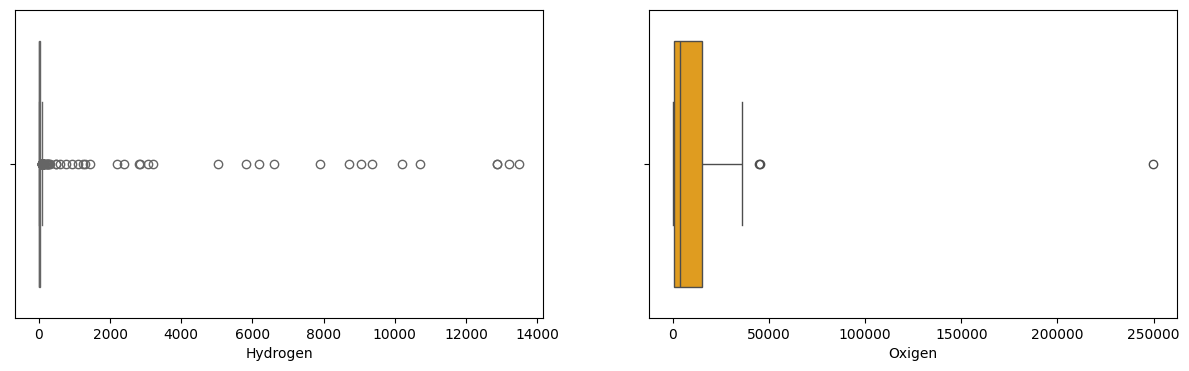

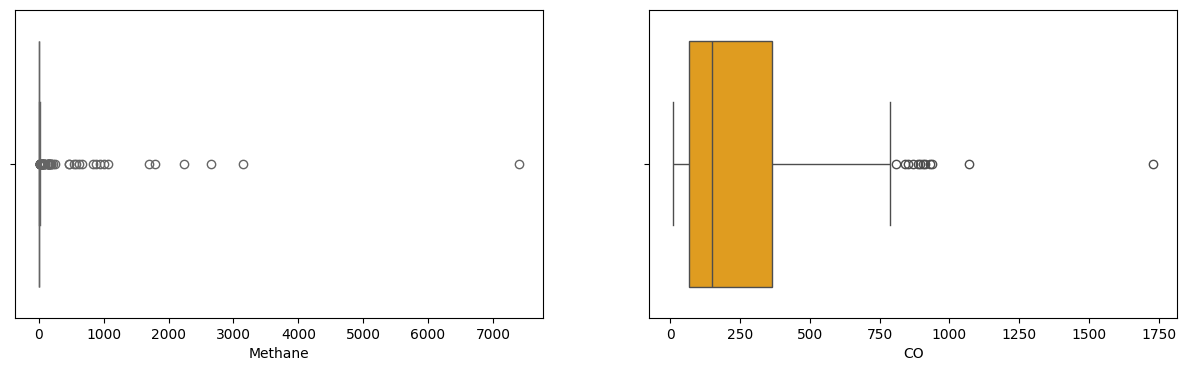

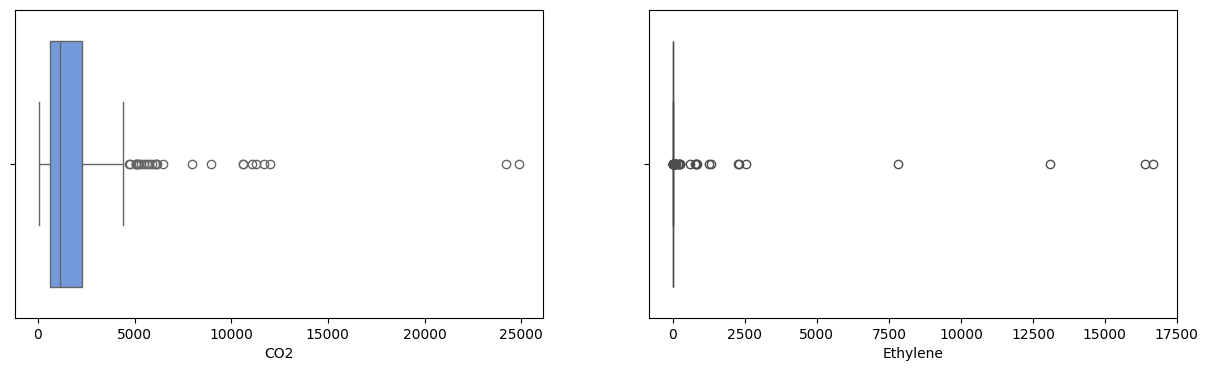

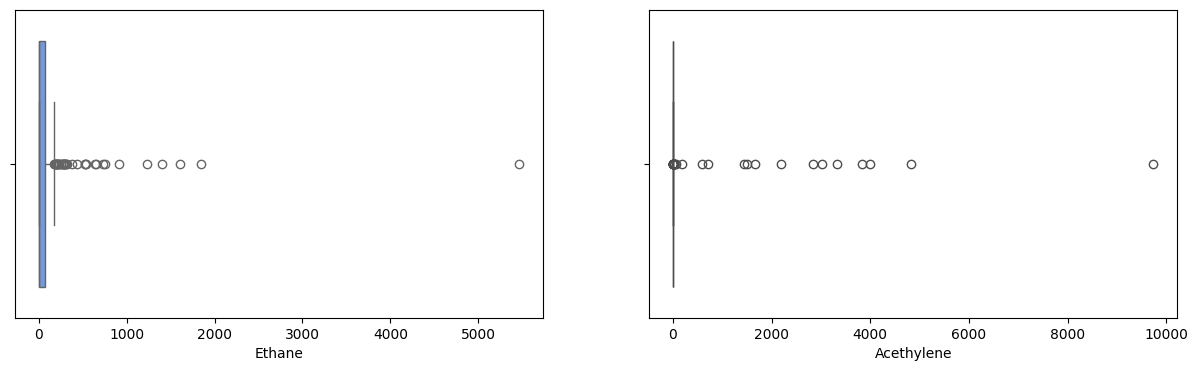

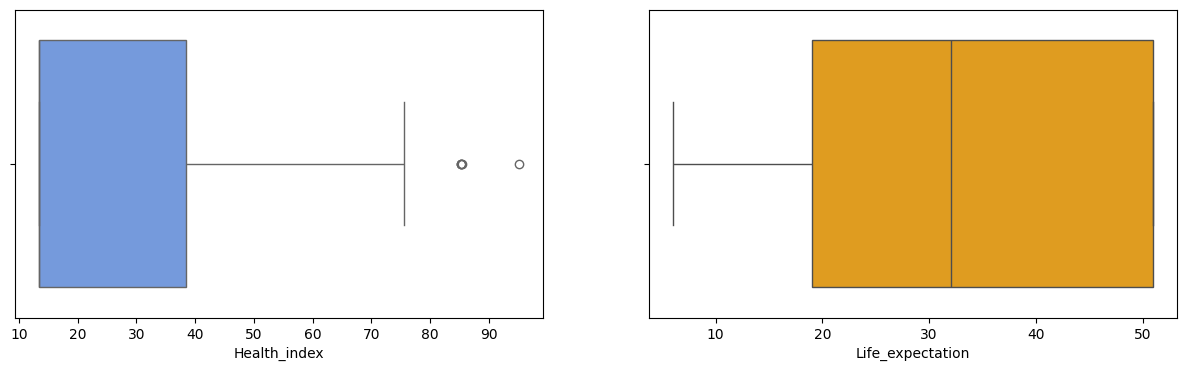

In [10]:
numerical = ['Hydrogen' , 'Oxigen' , 'Methane' , 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'Health_index', "Life_expectation"]
i = 0


while i < len(numerical):
    fig = plt.figure(figsize=[15, 4])
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first location
    sns.boxplot(x=numerical[i], data=df, color='cornflowerblue')
    i += 1  # next step
    if i == len(numerical):
        break
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numerical[i], data=df, color='orange')
    i += 1
    plt.show()

Hydrogen> 15000

Oxigen>40000

Methane>2000

CO>1000

CO2>15000

Ethylene>7500

Ethane>3000

Acethylene>6000

H2O>100

Health_index>80 là nhiễu

In [11]:
df1=df.index[(df['Hydrogen']>15000)]
df2=df.index[(df['Oxigen']>40000)]
df3=df.index[(df['Methane']>2000)]
df4=df.index[(df['CO']>1250)]
df5=df.index[(df['CO2']>15000)]
df6=df.index[(df['Ethylene']>7500)]
df7=df.index[(df['Ethane']>3000)]
df8=df.index[(df['Acethylene']>6000)]
df9=df.index[(df['H2O']>100)]
df10=df.index[(df['Health_index']>80)]

In [12]:
print(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10)

Index([], dtype='int64') Index([44, 247, 392], dtype='int64') Index([0, 5, 14, 15], dtype='int64') Index([18], dtype='int64') Index([18, 358], dtype='int64') Index([0, 13, 14, 15], dtype='int64') Index([0], dtype='int64') Index([16], dtype='int64') Index([383], dtype='int64') Index([0, 1, 2, 3, 4], dtype='int64')


In [13]:
DF= df.drop([13,45,250,395,0,5,13,14,15,16,17,19,361,38,39,40,386,0,1,2,3,4])
DF

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
6       10200   11900      573   87   611         0     162           0    5   
7           3   15459        5   68   902        12       2          13    6   
8          16    2470        8  520  2660         5       8           2    4   
9         488   11861       13   85  1957        29      23           0   10   
10          4   26100        1  206  1440        13       0          13    4   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
462        15     227        3   60   853         3      84           0   28   
463        15     334        3   64   622         3     108           0   12   
464        15    1280        2  675  2530         0       0           0    8   
465        15     169        5   77   532         0      72           0   11   
466        15     308        3   64   581         5      27           0   18   

     Health_index  Life_expectation  
6            75.6               6.0  
7            73.2              19.0  
8            72.8               6.0  
9            68.0               6.0  
10           63.4               6.0  
..            ...               ...  
462          13.4              51.0  
463          13.4              51.0  
464          13.4               6.5  
465          13.4              51.0  
466          13.4              51.0  

[447 rows x 11 columns]

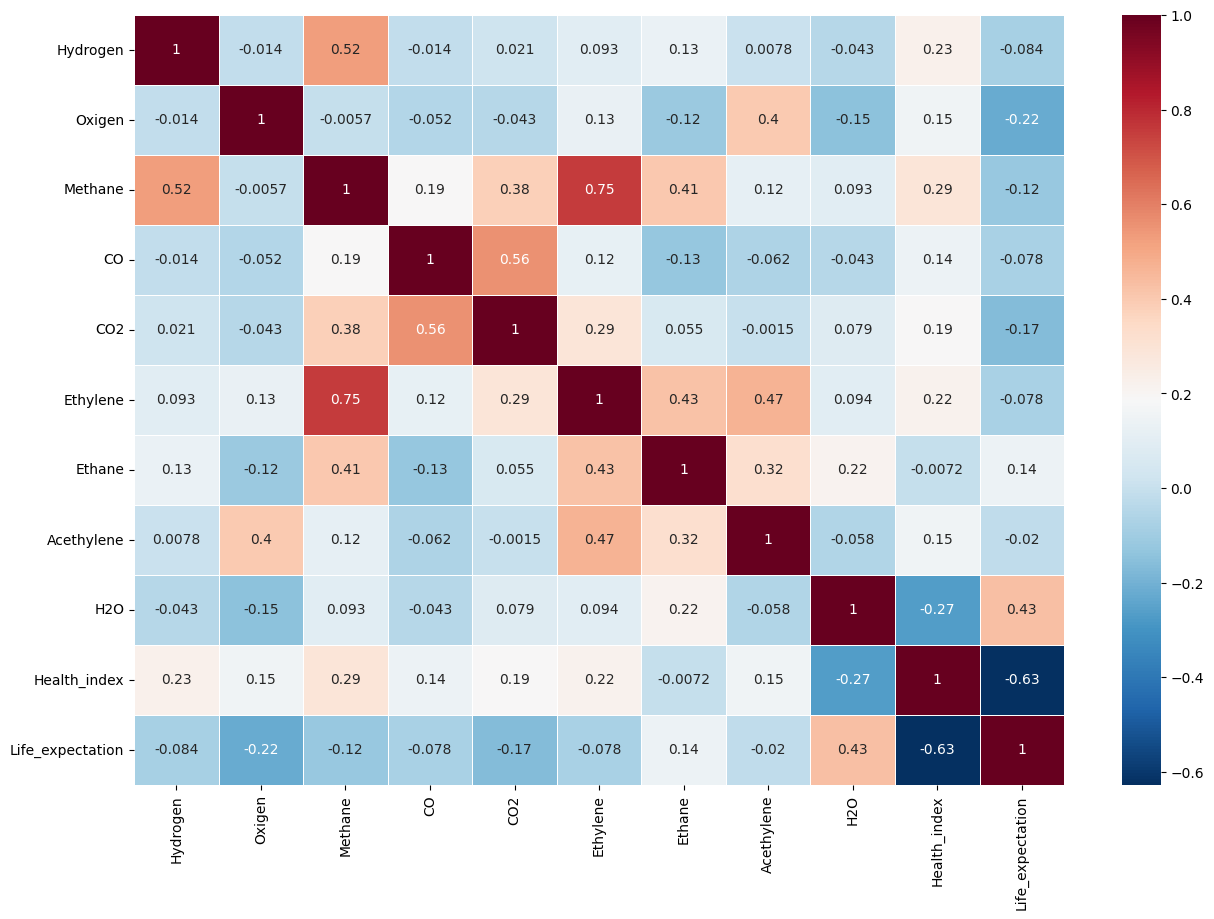

In [14]:
fig, ax = plt.subplots (figsize = (15,10)) 
sns.heatmap (DF.corr (), cmap = 'RdBu_r' , cbar = True , annot = True , linewidth = 0.5 ,ax = ax) 
plt.show ()

In [15]:
DF.corr()

Hydrogen    Oxigen   Methane        CO       CO2  Ethylene  \
Hydrogen          1.000000 -0.013748  0.524174 -0.013620  0.020859  0.092510   
Oxigen           -0.013748  1.000000 -0.005707 -0.051812 -0.043500  0.126437   
Methane           0.524174 -0.005707  1.000000  0.188596  0.377116  0.752776   
CO               -0.013620 -0.051812  0.188596  1.000000  0.559206  0.116612   
CO2               0.020859 -0.043500  0.377116  0.559206  1.000000  0.291018   
Ethylene          0.092510  0.126437  0.752776  0.116612  0.291018  1.000000   
Ethane            0.132138 -0.115968  0.406712 -0.125595  0.055350  0.426487   
Acethylene        0.007848  0.399807  0.116146 -0.062085 -0.001531  0.467806   
H2O              -0.043239 -0.145389  0.093128 -0.043018  0.079239  0.093677   
Health_index      0.229711  0.152005  0.292659  0.139537  0.186513  0.223678   
Life_expectation -0.083808 -0.222394 -0.121678 -0.077932 -0.166256 -0.078442   

                    Ethane  Acethylene       H2O  Health_index  \
Hydrogen          0.132138    0.007848 -0.043239      0.229711   
Oxigen           -0.115968    0.399807 -0.145389      0.152005   
Methane           0.406712    0.116146  0.093128      0.292659   
CO               -0.125595   -0.062085 -0.043018      0.139537   
CO2               0.055350   -0.001531  0.079239      0.186513   
Ethylene          0.426487    0.467806  0.093677      0.223678   
Ethane            1.000000    0.322468  0.216883     -0.007211   
Acethylene        0.322468    1.000000 -0.057531      0.151446   
H2O               0.216883   -0.057531  1.000000     -0.268536   
Health_index     -0.007211    0.151446 -0.268536      1.000000   
Life_expectation  0.138393   -0.020166  0.428237     -0.627404   

                  Life_expectation  
Hydrogen                 -0.083808  
Oxigen                   -0.222394  
Methane                  -0.121678  
CO                       -0.077932  
CO2                      -0.166256  
Ethylene                 -0.078442  
Ethane                    0.138393  
Acethylene               -0.020166  
H2O                       0.428237  
Health_index             -0.627404  
Life_expectation          1.000000

In [16]:
# plt.figure(figsize=(10, 6))
# sns.kdeplot(Df['Health_index'], label='Health_index', shade=True, color='blue')
# sns.kdeplot(Df['Life_expectation'], label='Life_expectation', shade=True, color='orange')

# # Thêm tiêu đề và nhãn
# plt.title('KDE Plot for Health_index and Life_expectation')
# plt.xlabel('Values')
# plt.ylabel('Density')

# # Thêm chú thích
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()

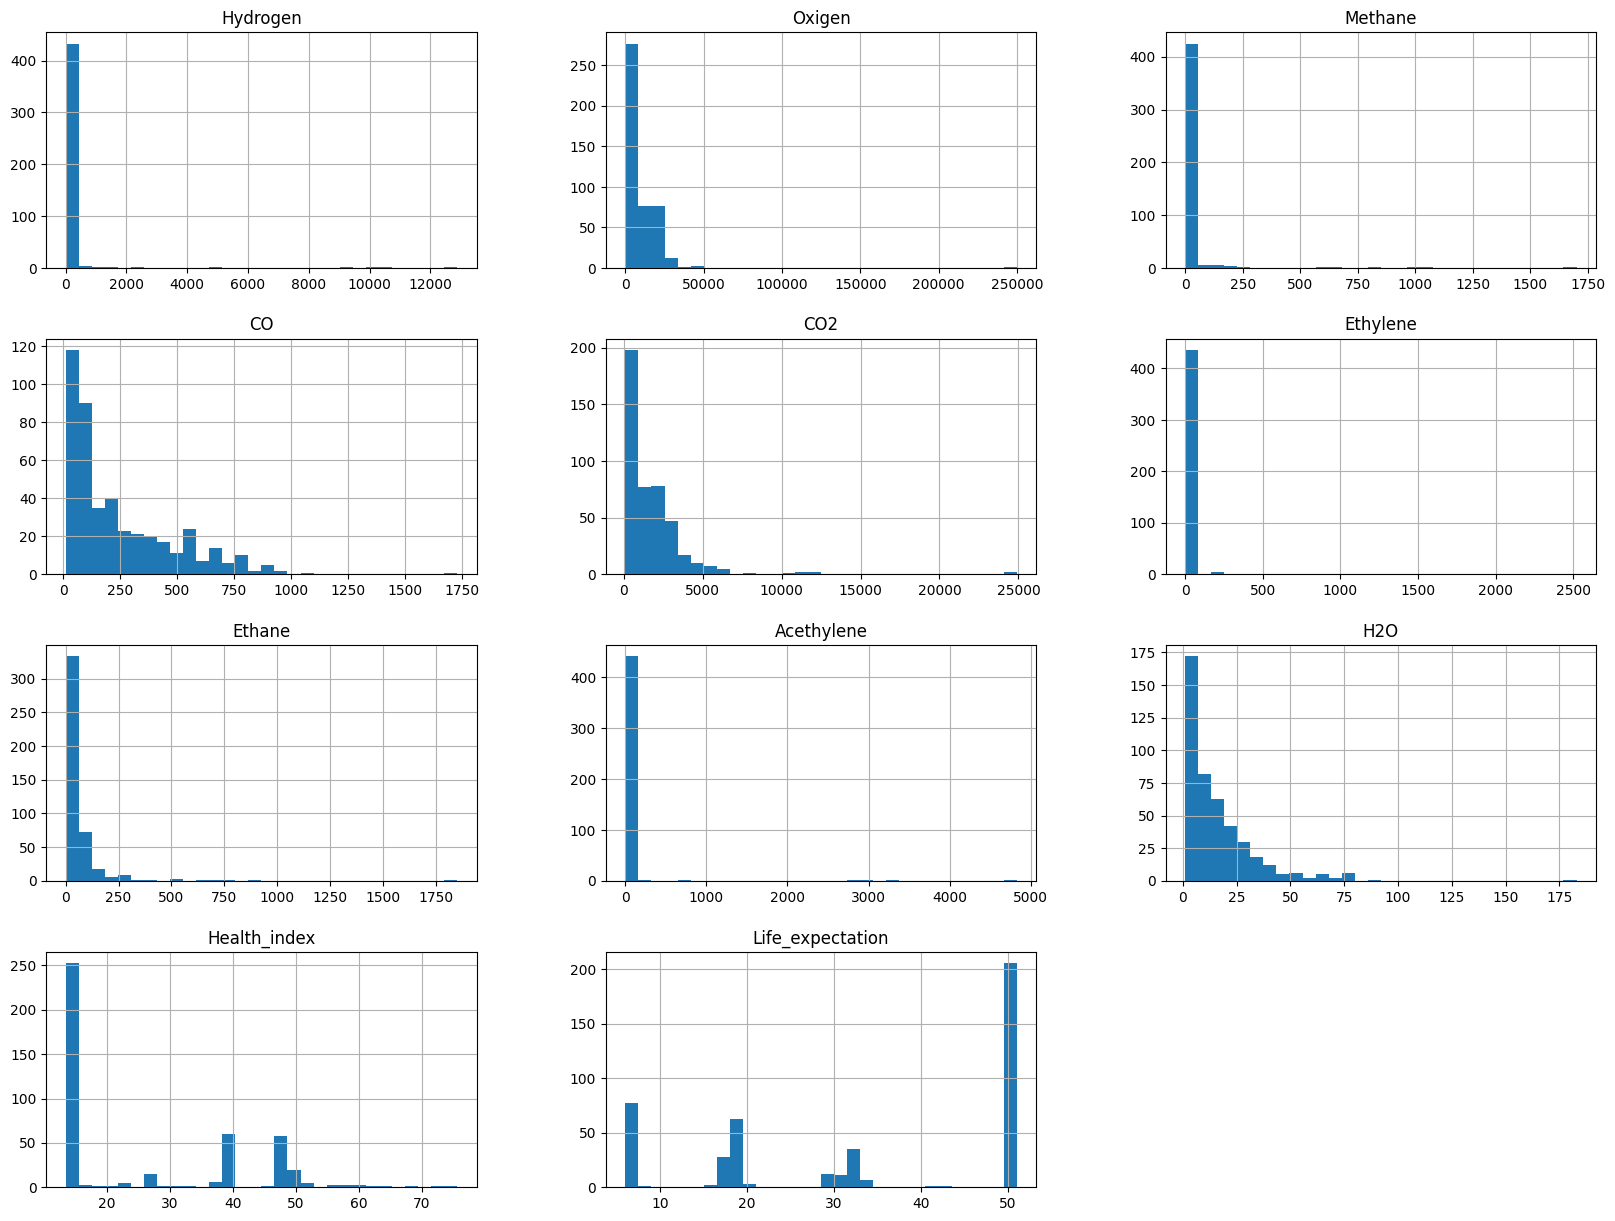

In [17]:
DF.hist(bins=30,figsize=(20,15))
plt.show()

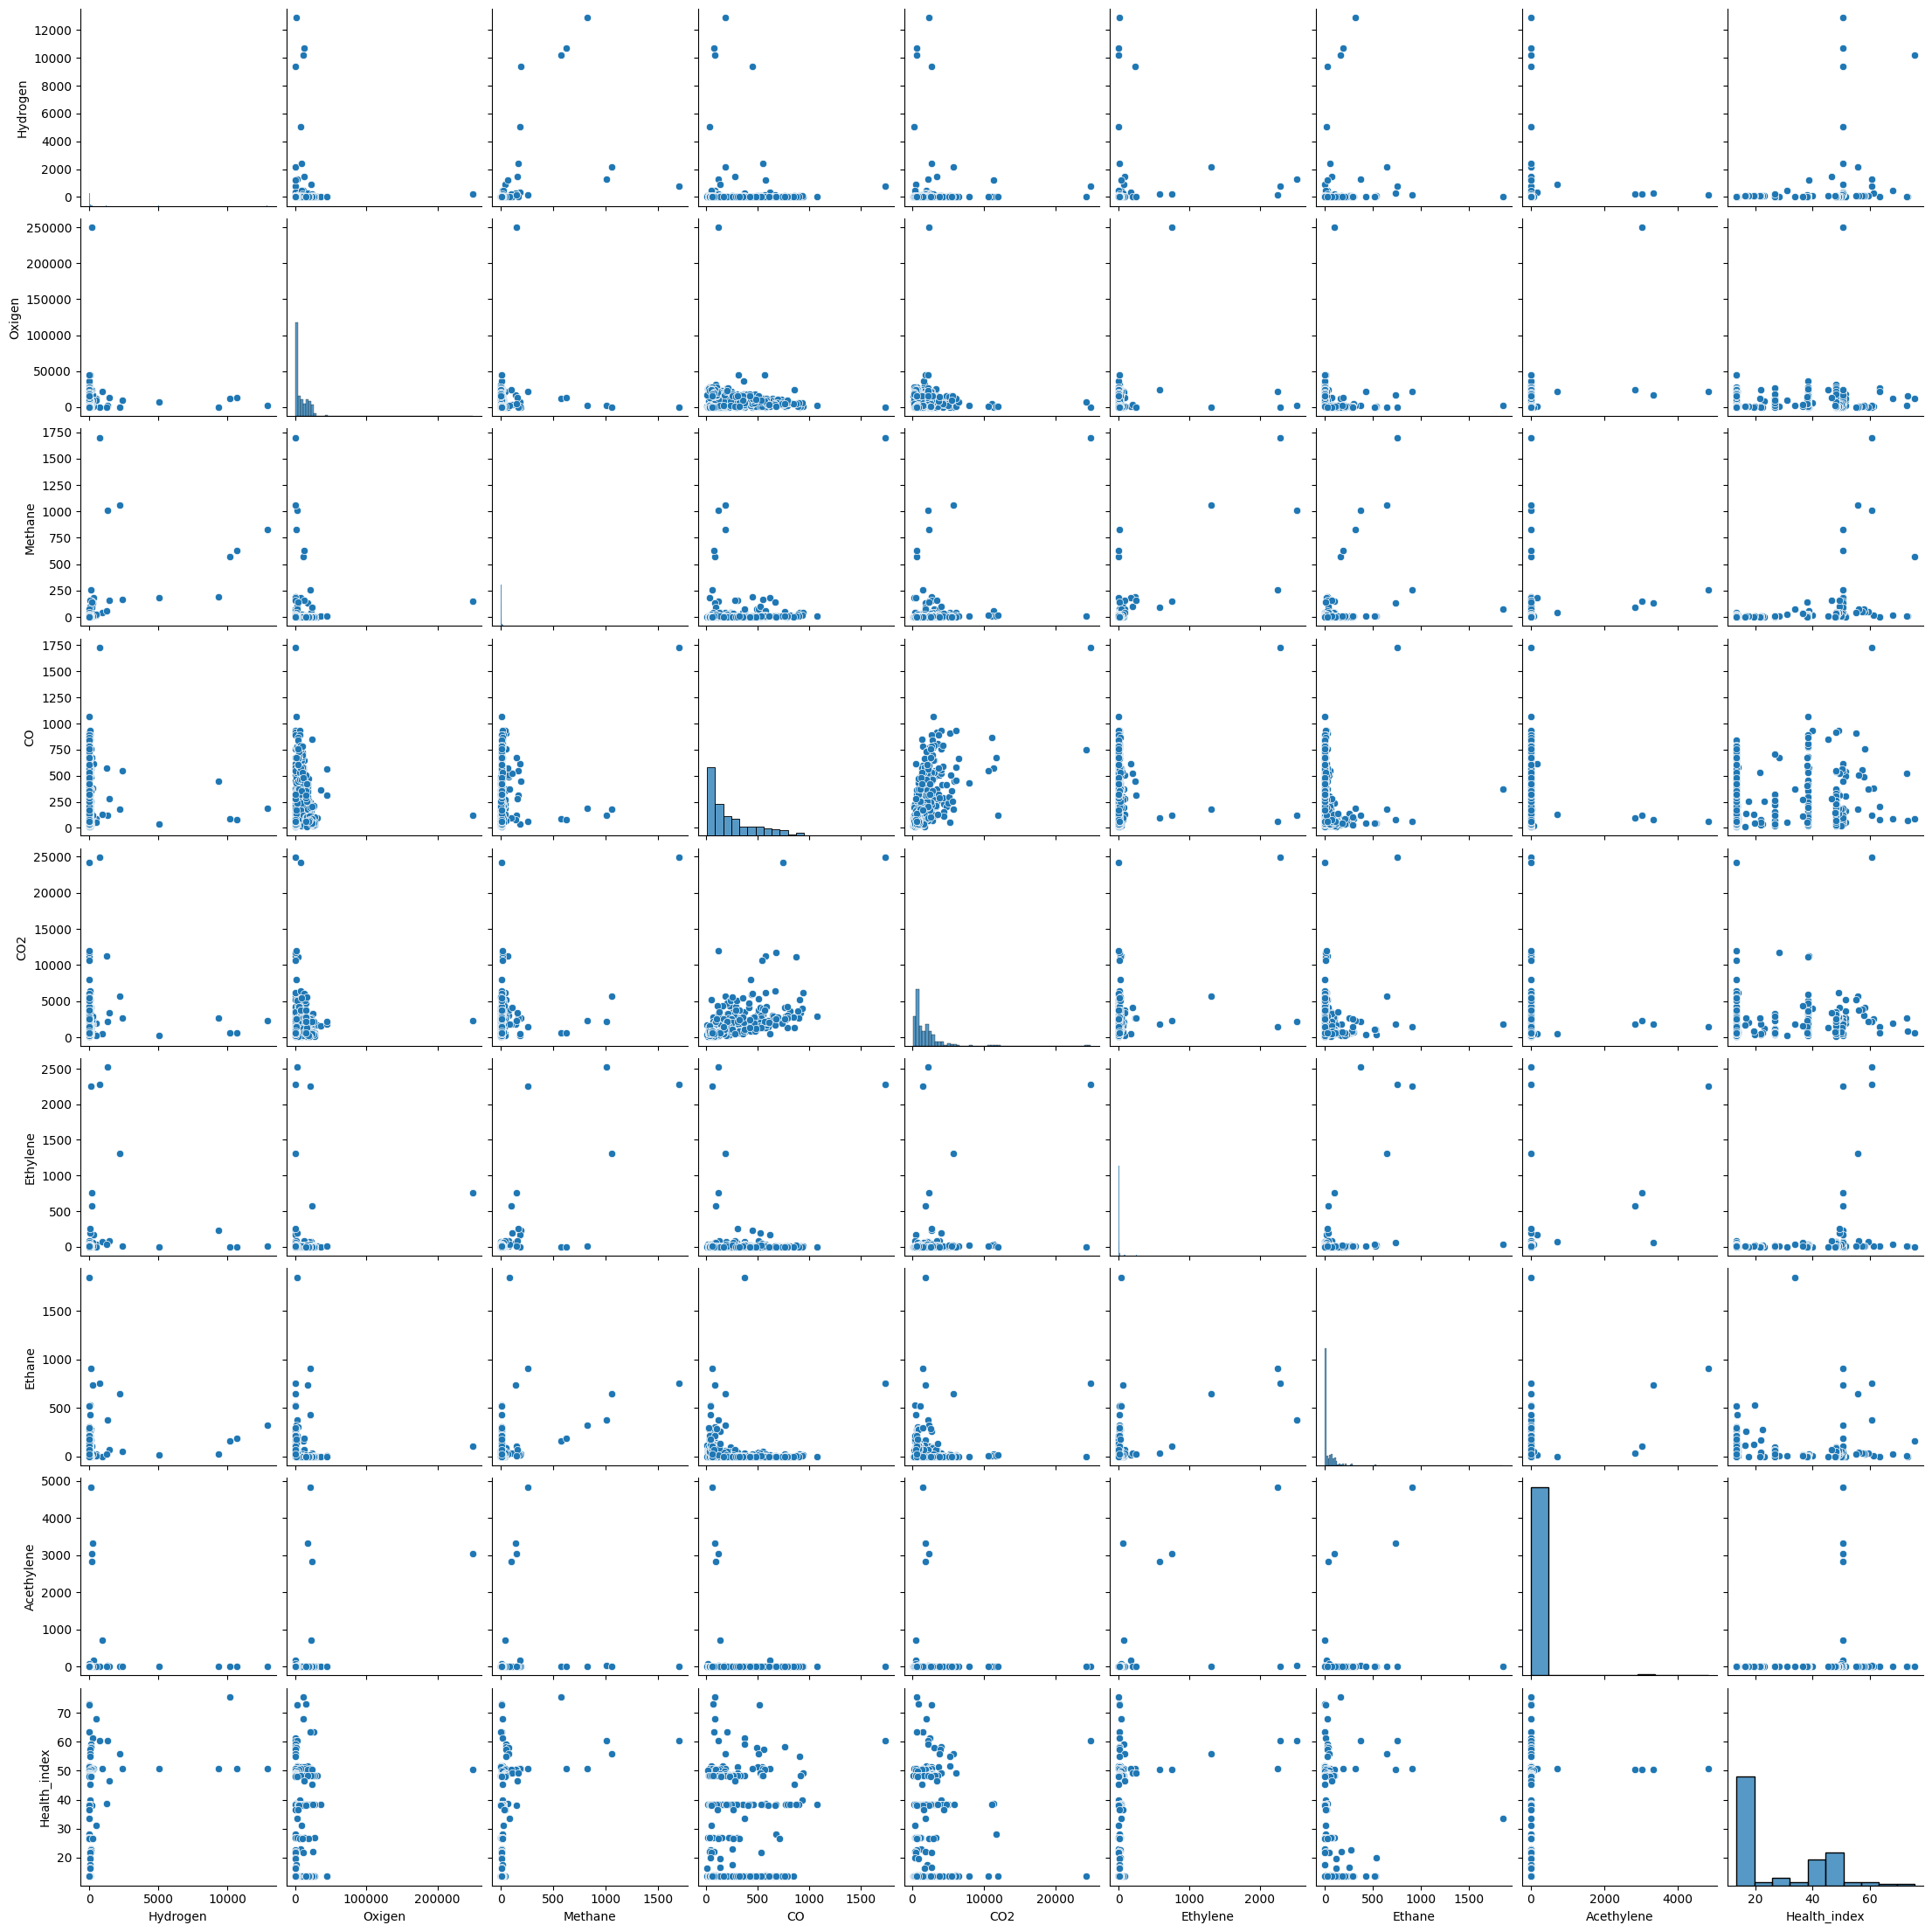

In [18]:
sns.pairplot(DF,
    x_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene", "Health_index"],
    y_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene", "Health_index"]
)

In [19]:
Df = DF.copy()

In [20]:
# scaler = StandardScaler()
# scaler.fit(Df)
# scaled_Df = pd.DataFrame(scaler.transform(Df),columns= Df.columns )

In [21]:
# scaled_Df.head()

In [22]:
x1 = Df.drop('Life_expectation', axis=1)
scaler1 = StandardScaler()
scaler1.fit(x1)
scaled_x1 = pd.DataFrame(scaler1.transform(x1), columns=x1.columns)
y1 = Df.Life_expectation.values.reshape(-1,1)
scaler2 = StandardScaler()
scaler2.fit(y1)
scaled_y1 = pd.DataFrame(scaler2.transform(y1), columns=['Life_expectation'])


In [23]:
x1_train , x1_test , y1_train , y1_test = train_test_split (scaled_x1 , scaled_y1 , test_size = 0.2 , random_state = 1)

In [24]:
print ('x1_train:' , x1_train.shape)
print ('x1_test:' , x1_test.shape)
print ('y1_train:' , y1_train.shape)
print ('y1_test:' , y1_test.shape)

x1_train: (357, 10)
x1_test: (90, 10)
y1_train: (357, 1)
y1_test: (90, 1)


# Huấn luyện mô hình


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=1),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=1),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=1),
    'SVM': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=1),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Initialize results dictionary
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': [],
    'Mean CV Score': []
}

kfold_validation = KFold(n_splits=5, shuffle=True, random_state=1)

# Train and evaluate each model
for name, model in models.items():
    model.fit(x1_train, y1_train.values.ravel())
    y_pred = model.predict(x1_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y1_test, y_pred)
    mse = mean_squared_error(y1_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y1_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, x1_train, y1_train.values.ravel(), cv=kfold_validation)
    mean_cv_score = np.mean(cv_scores)
    
    # Store results
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)
    results['Mean CV Score'].append(mean_cv_score)

# Format the results better
pd.set_option('display.float_format', lambda x: '%.4f' % x)
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print("-" * 100)
print(results_df.to_string(index=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 357, number of used features: 9
[LightGBM] [Info] Start training from score -0.038350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [26]:
# Df

In [27]:
# Create DataFrame with the new data
new_data = pd.DataFrame([[48
,71,3
,36
,673
,4
,144
,0
,26
,13.4
]], 
                        columns=x1.columns)


scaled_new_data = pd.DataFrame(scaler1.transform(new_data), columns=x1.columns)

print("\nPredictions for new data:")
print("-" * 50)
for name, model in models.items():
    # Make prediction
    scaled_pred = model.predict(scaled_new_data)
    # Inverse transform to get original scale
    original_pred = scaler2.inverse_transform(scaled_pred.reshape(-1, 1))
    print(f"{name}: {original_pred[0][0]:.2f}")


Predictions for new data:
--------------------------------------------------
Linear Regression: 46.72
Ridge Regression: 46.68
Lasso Regression: 32.71
ElasticNet: 34.07
Random Forest: 51.00
Gradient Boosting: 51.93
AdaBoost: 49.09
XGBoost: 51.09
LightGBM: 50.51
SVM: 53.65
Neural Network: 51.44
Decision Tree: 51.00
K-Nearest Neighbors: 51.00


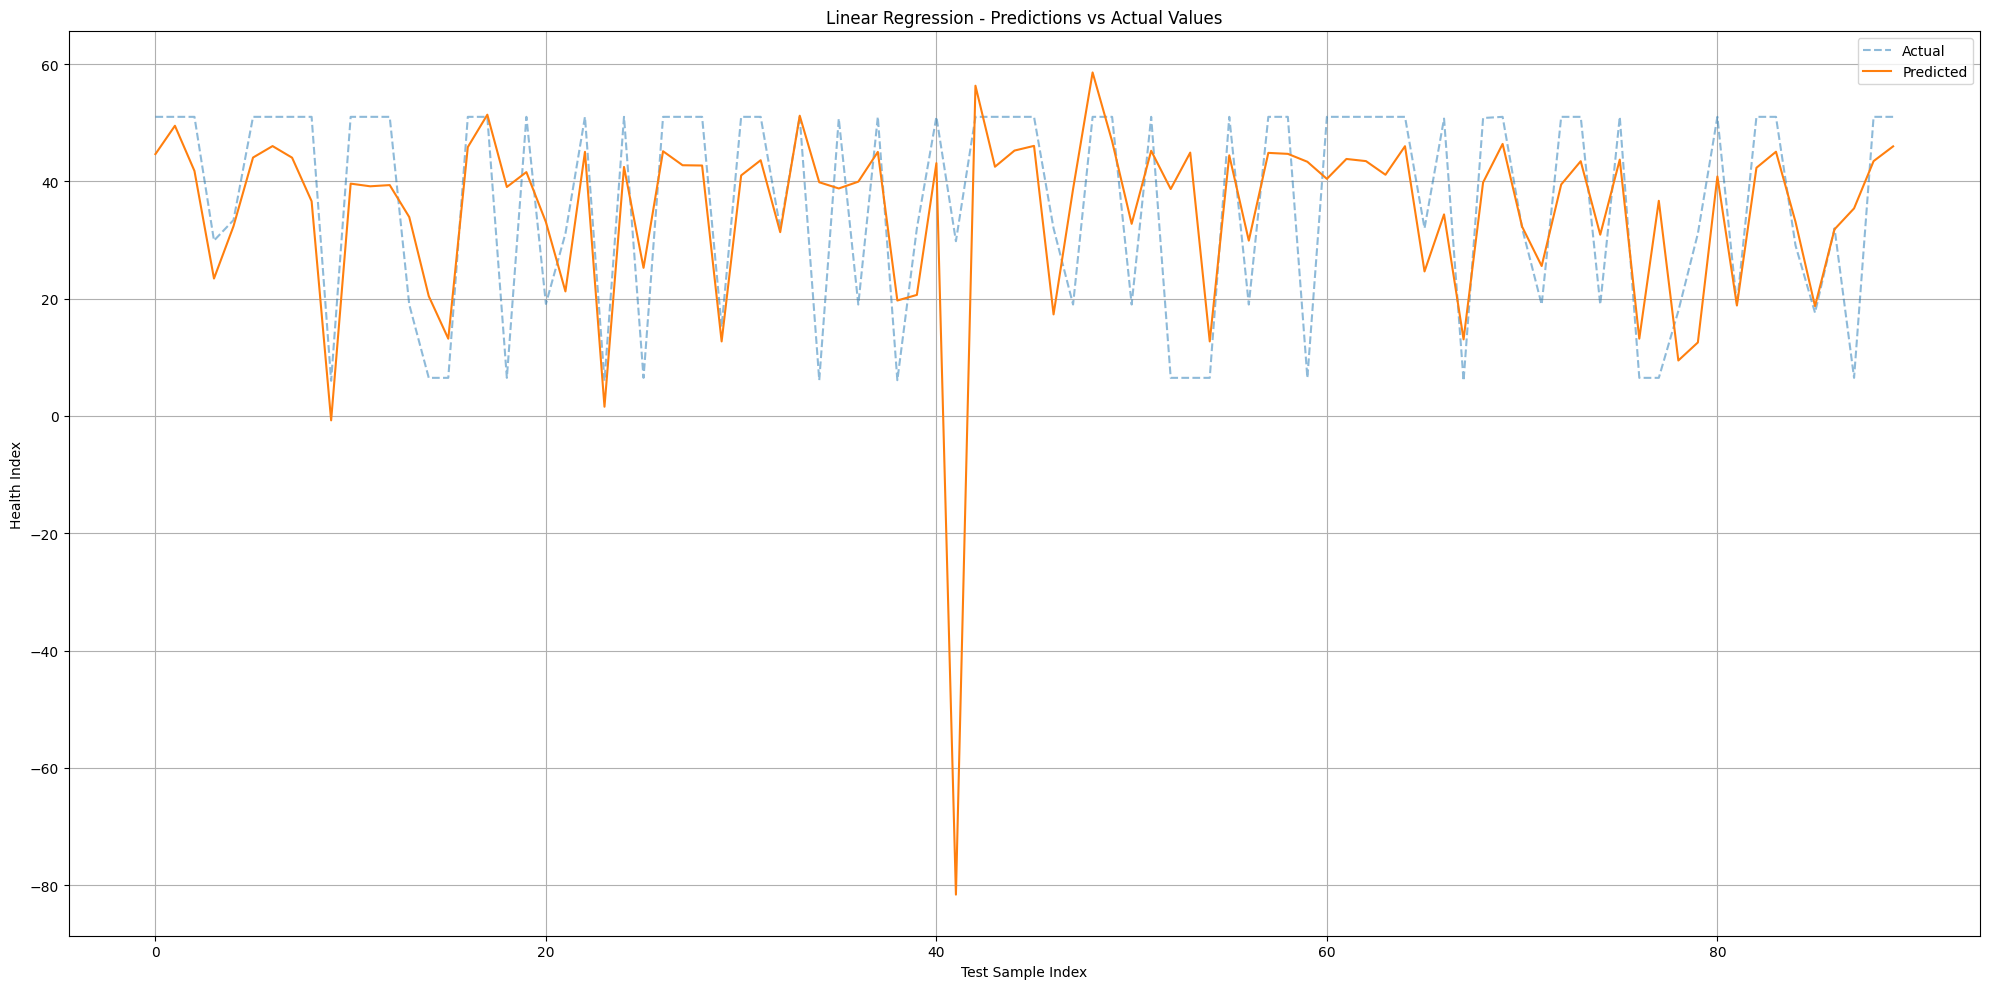

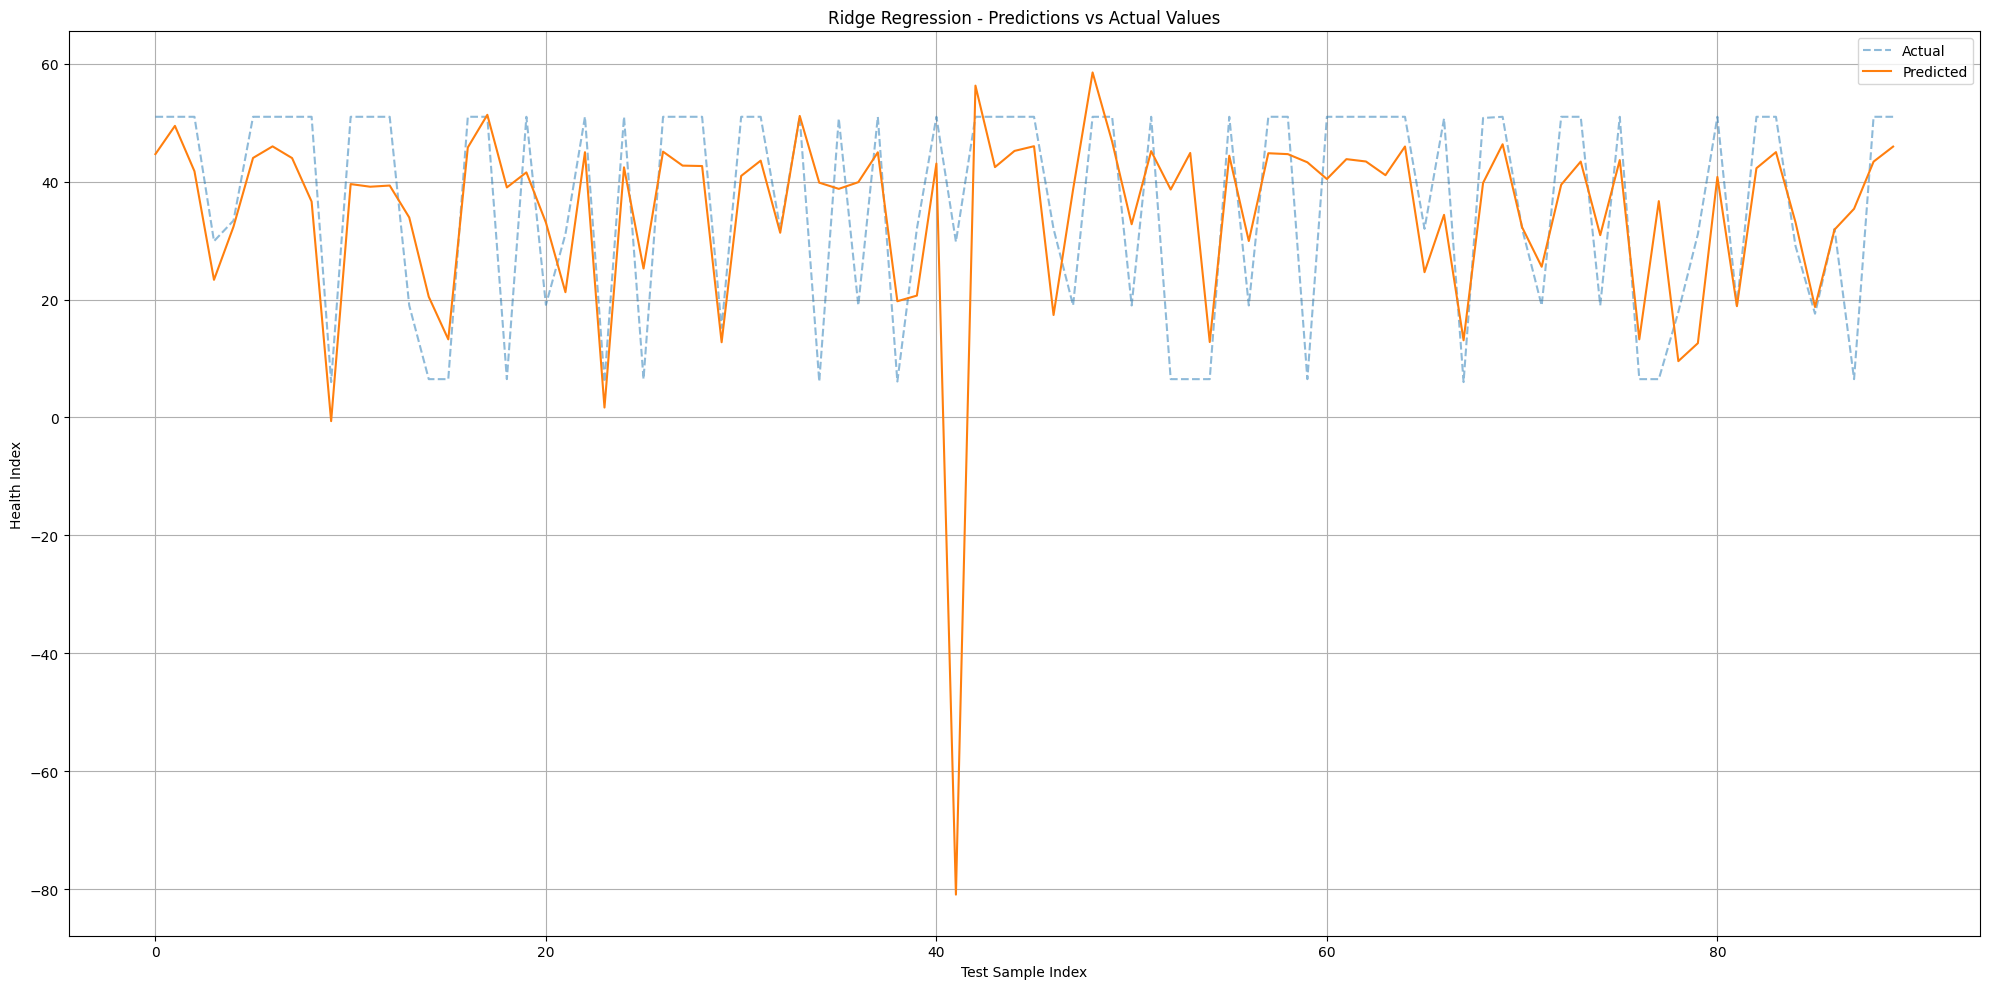

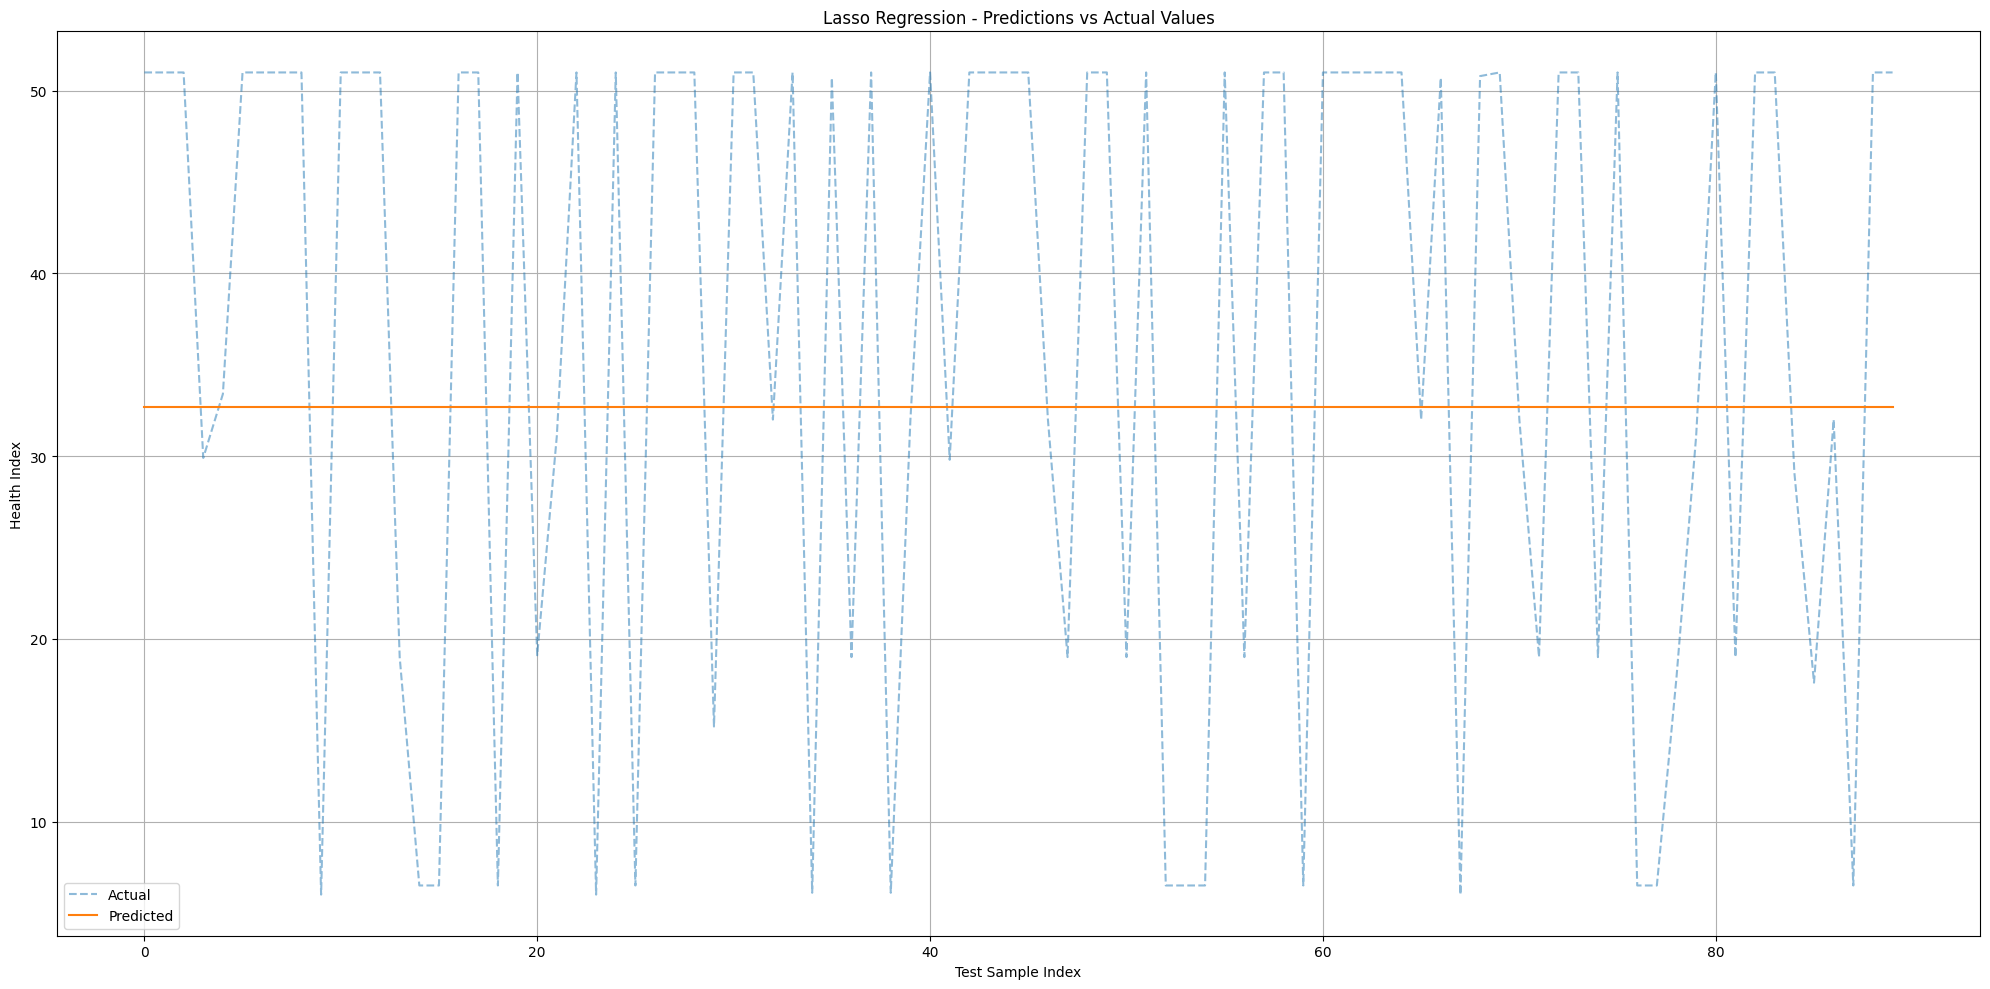

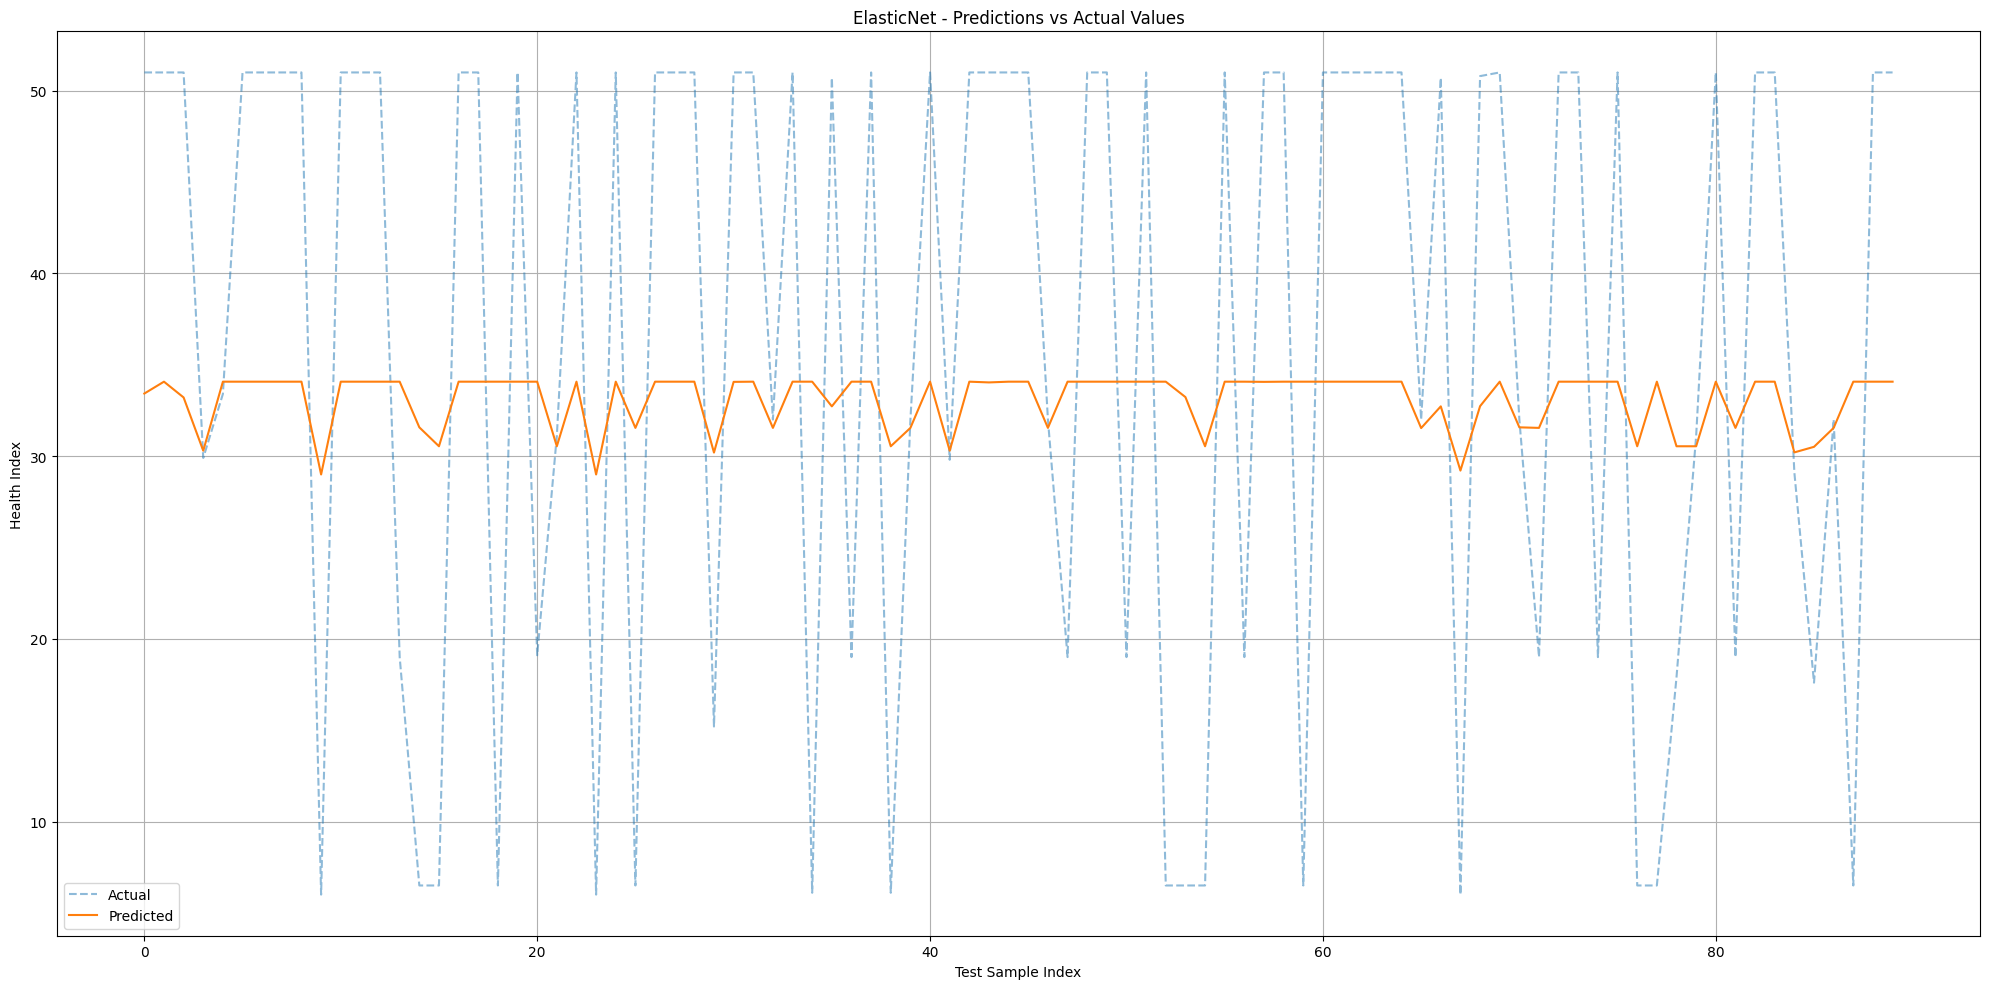

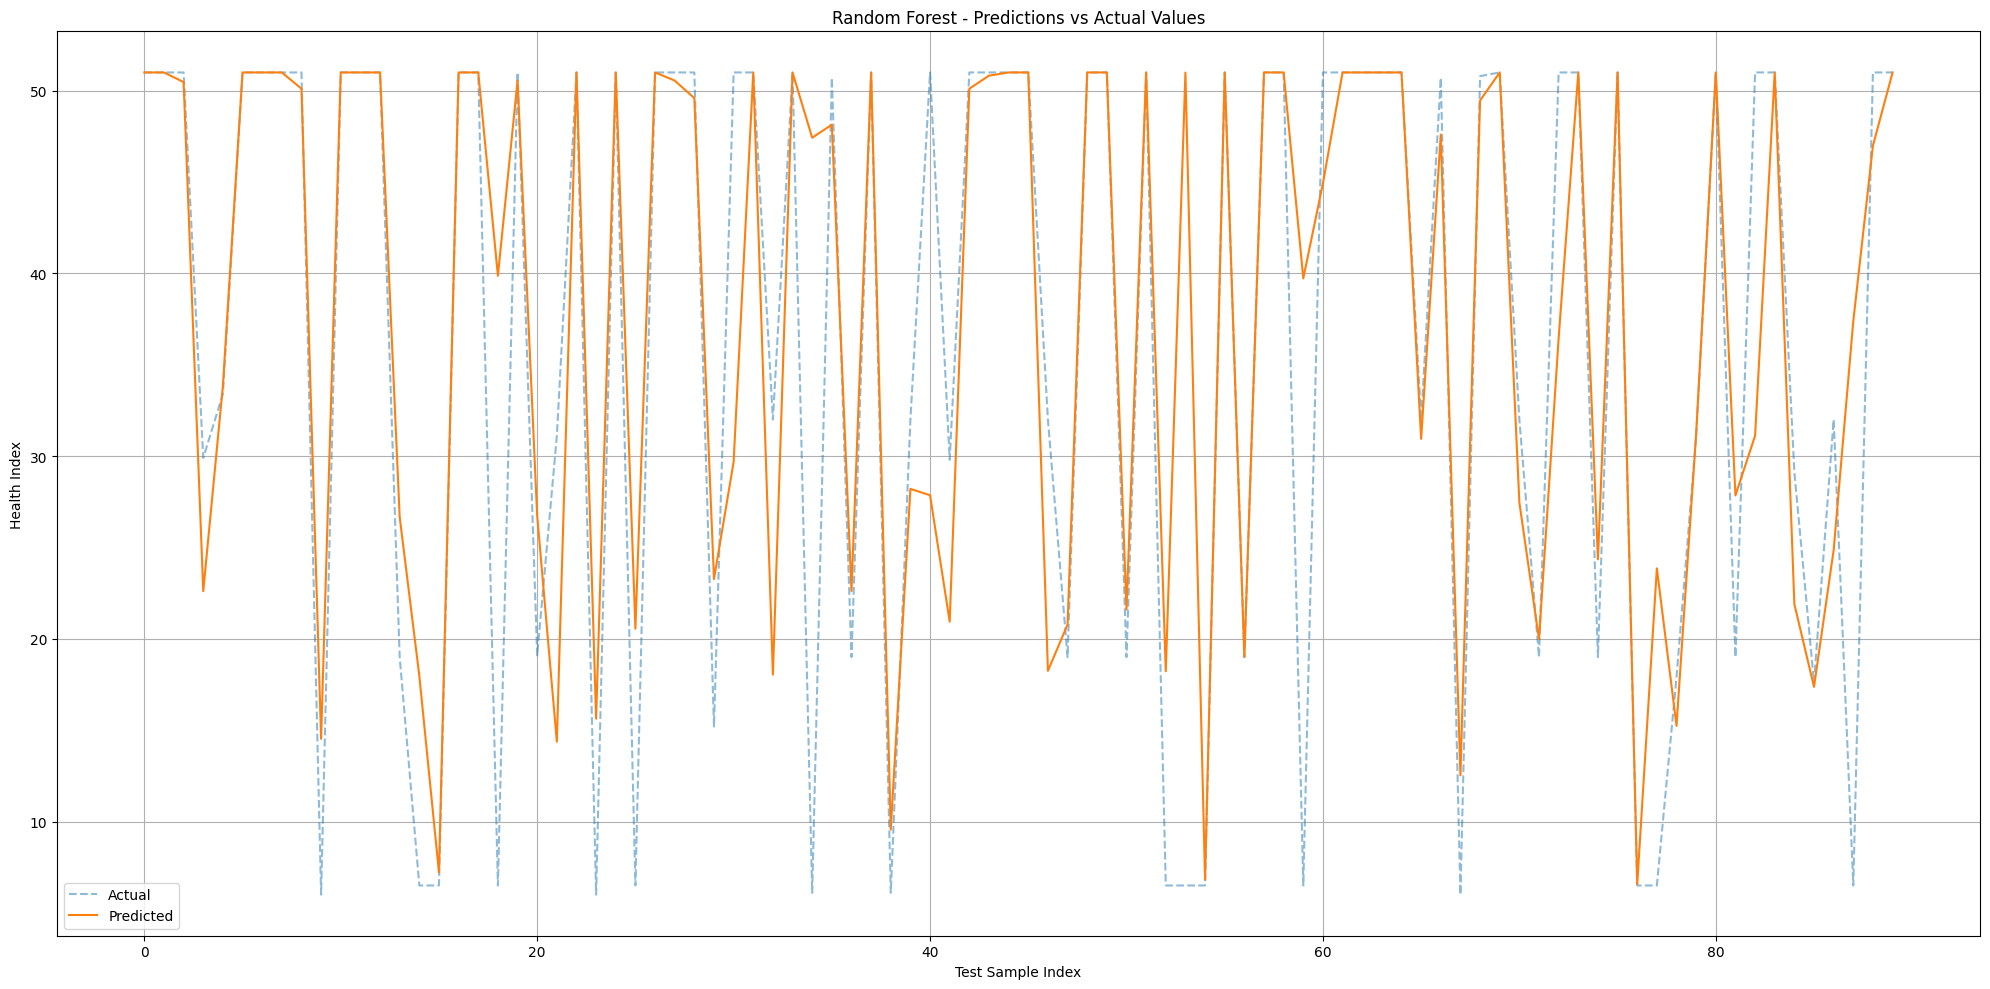

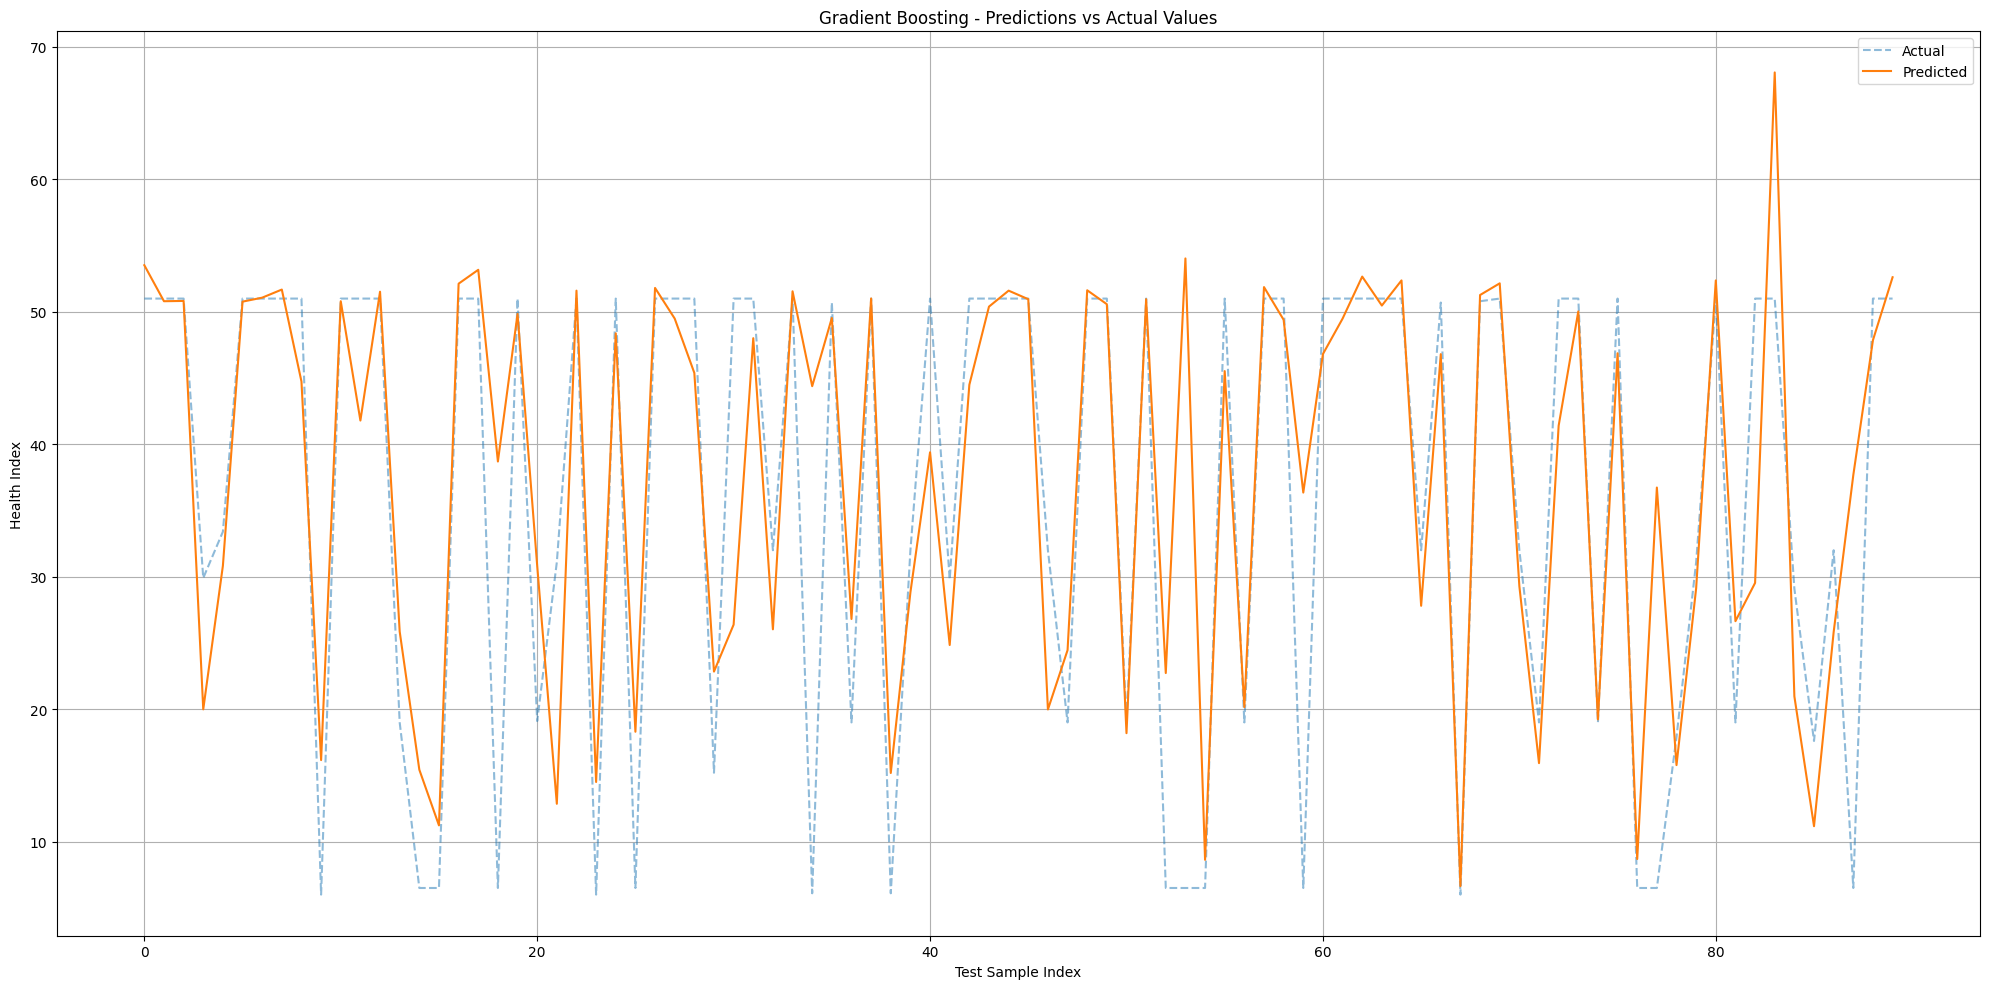

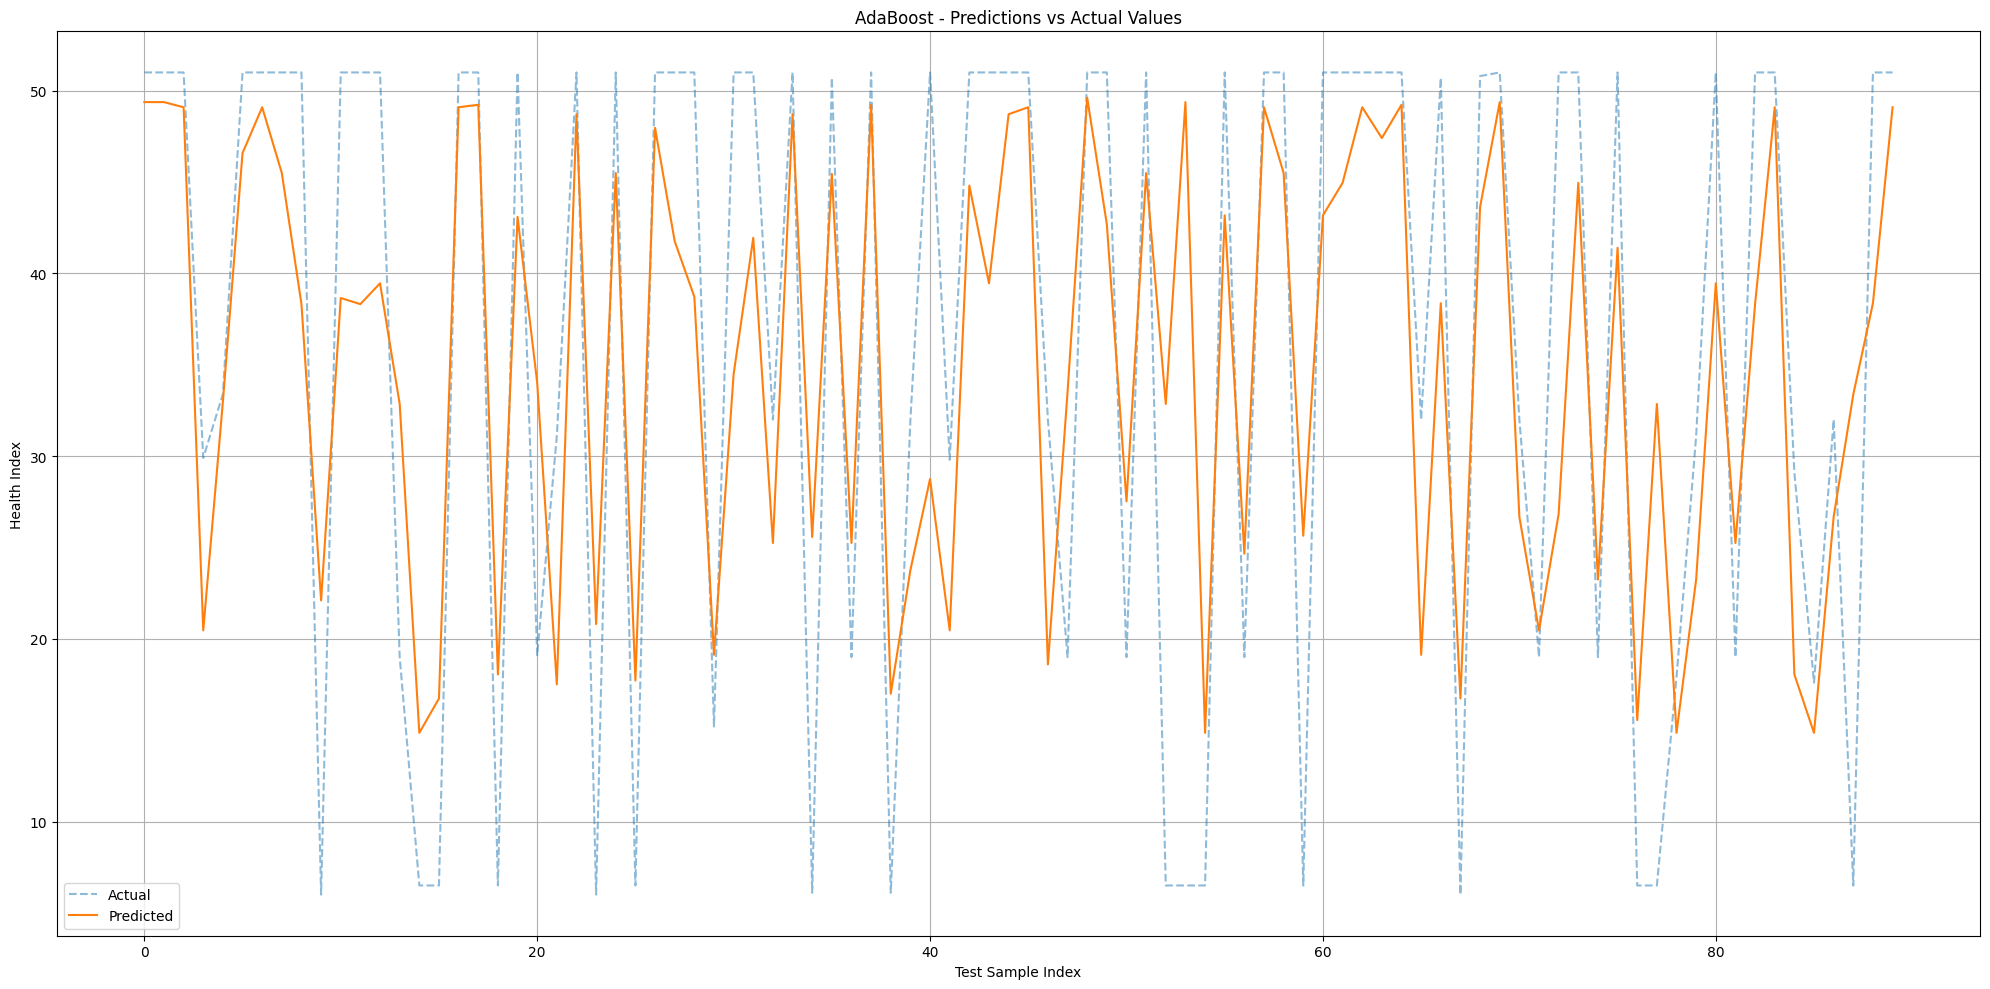

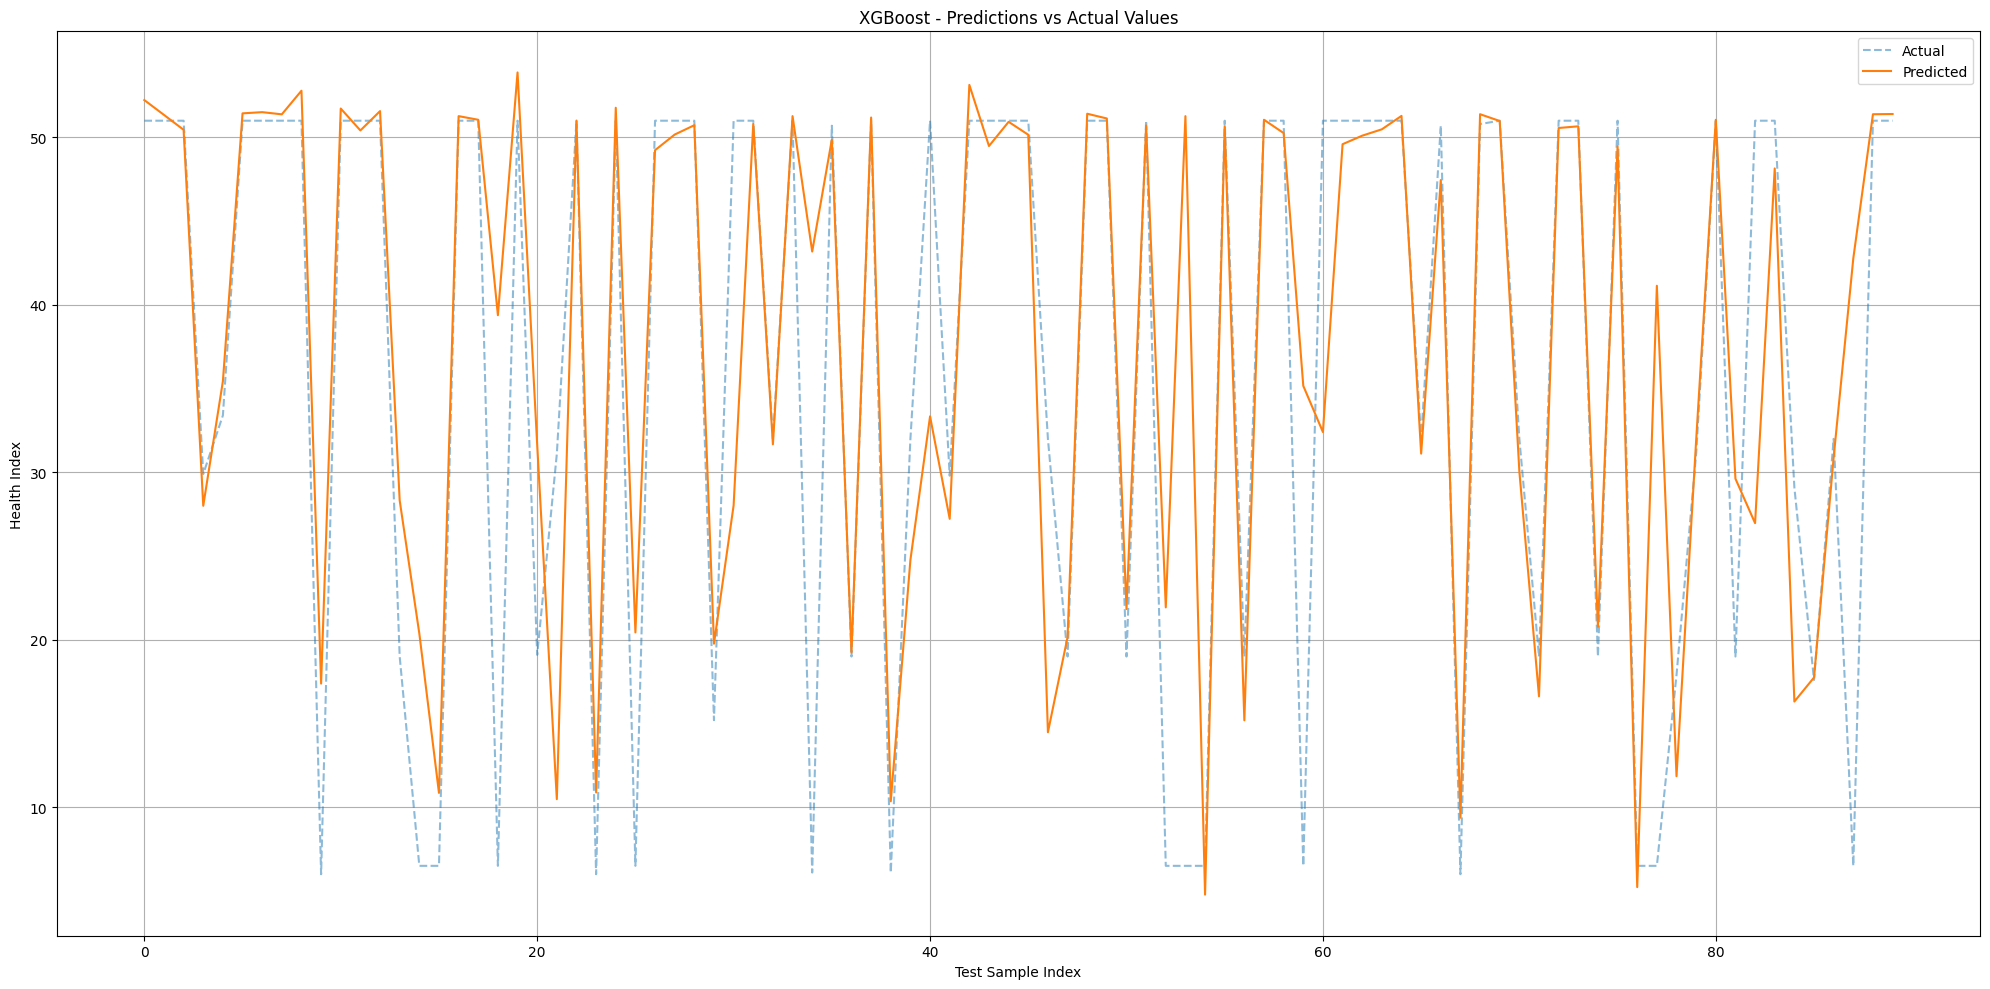

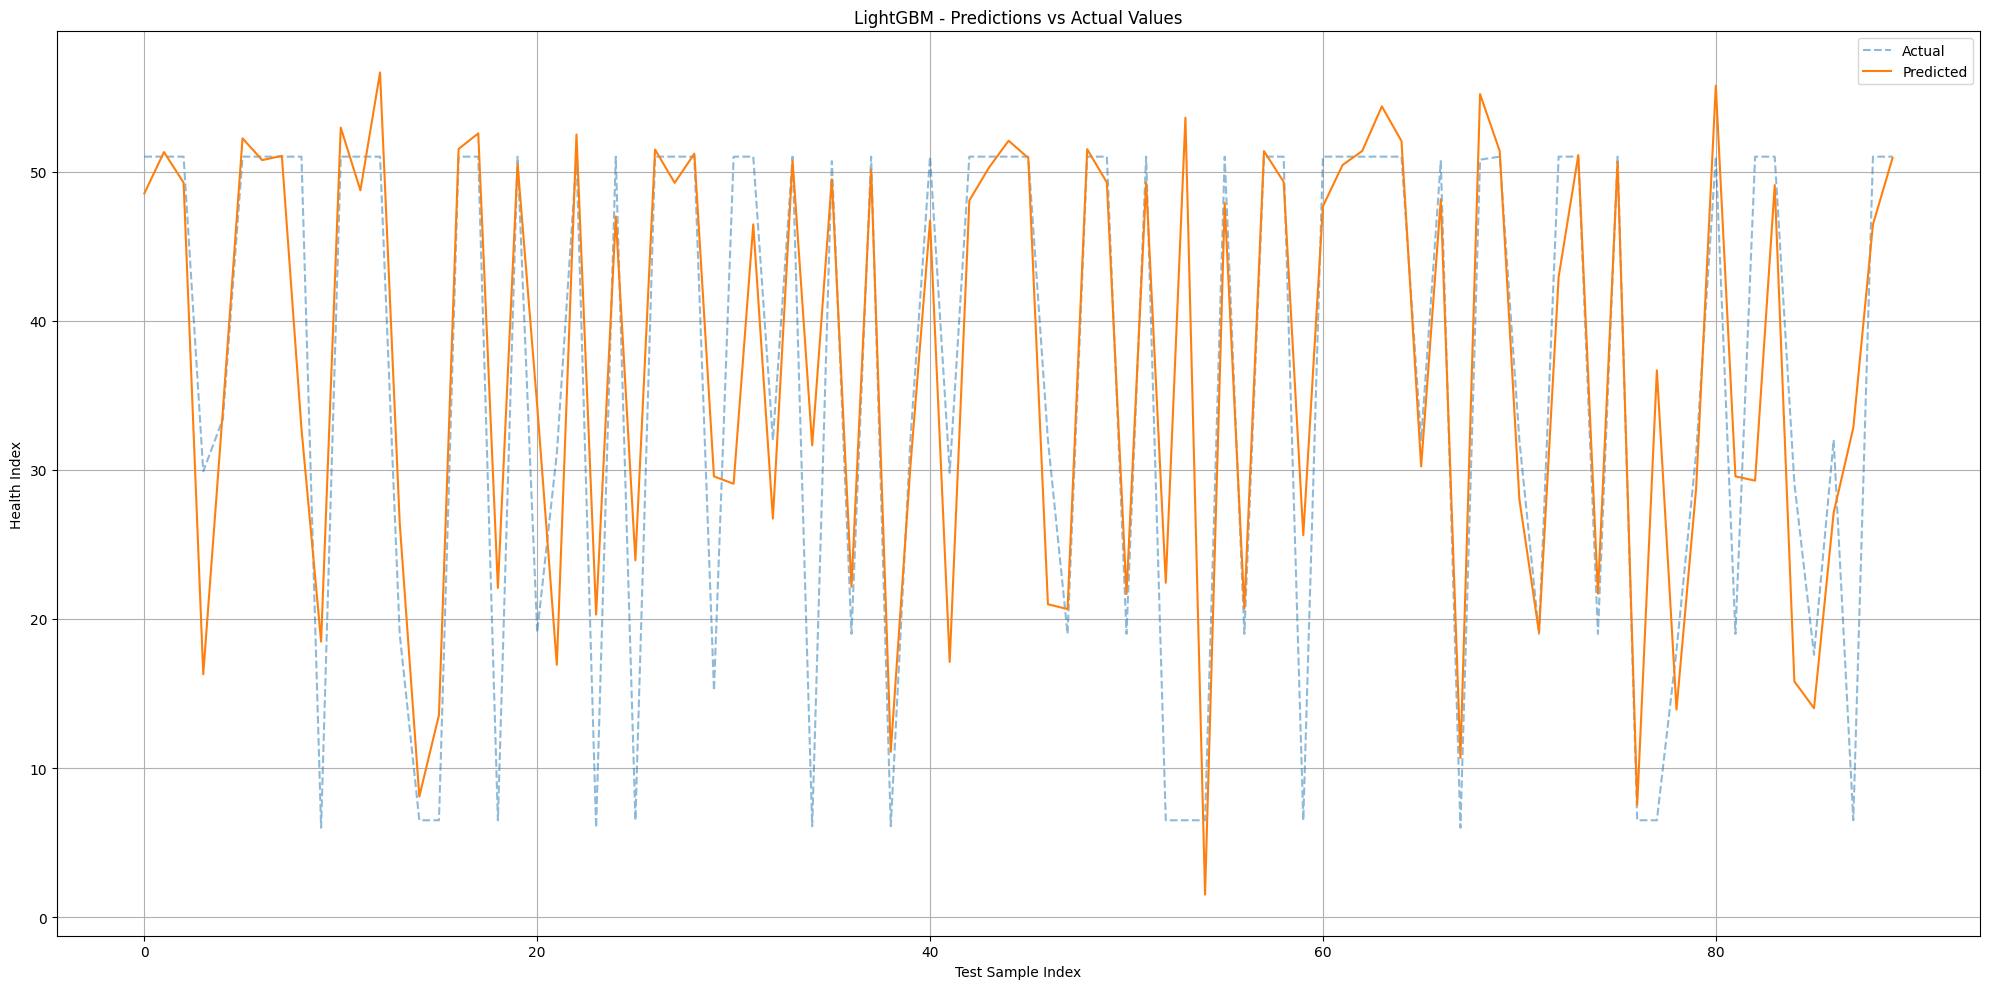

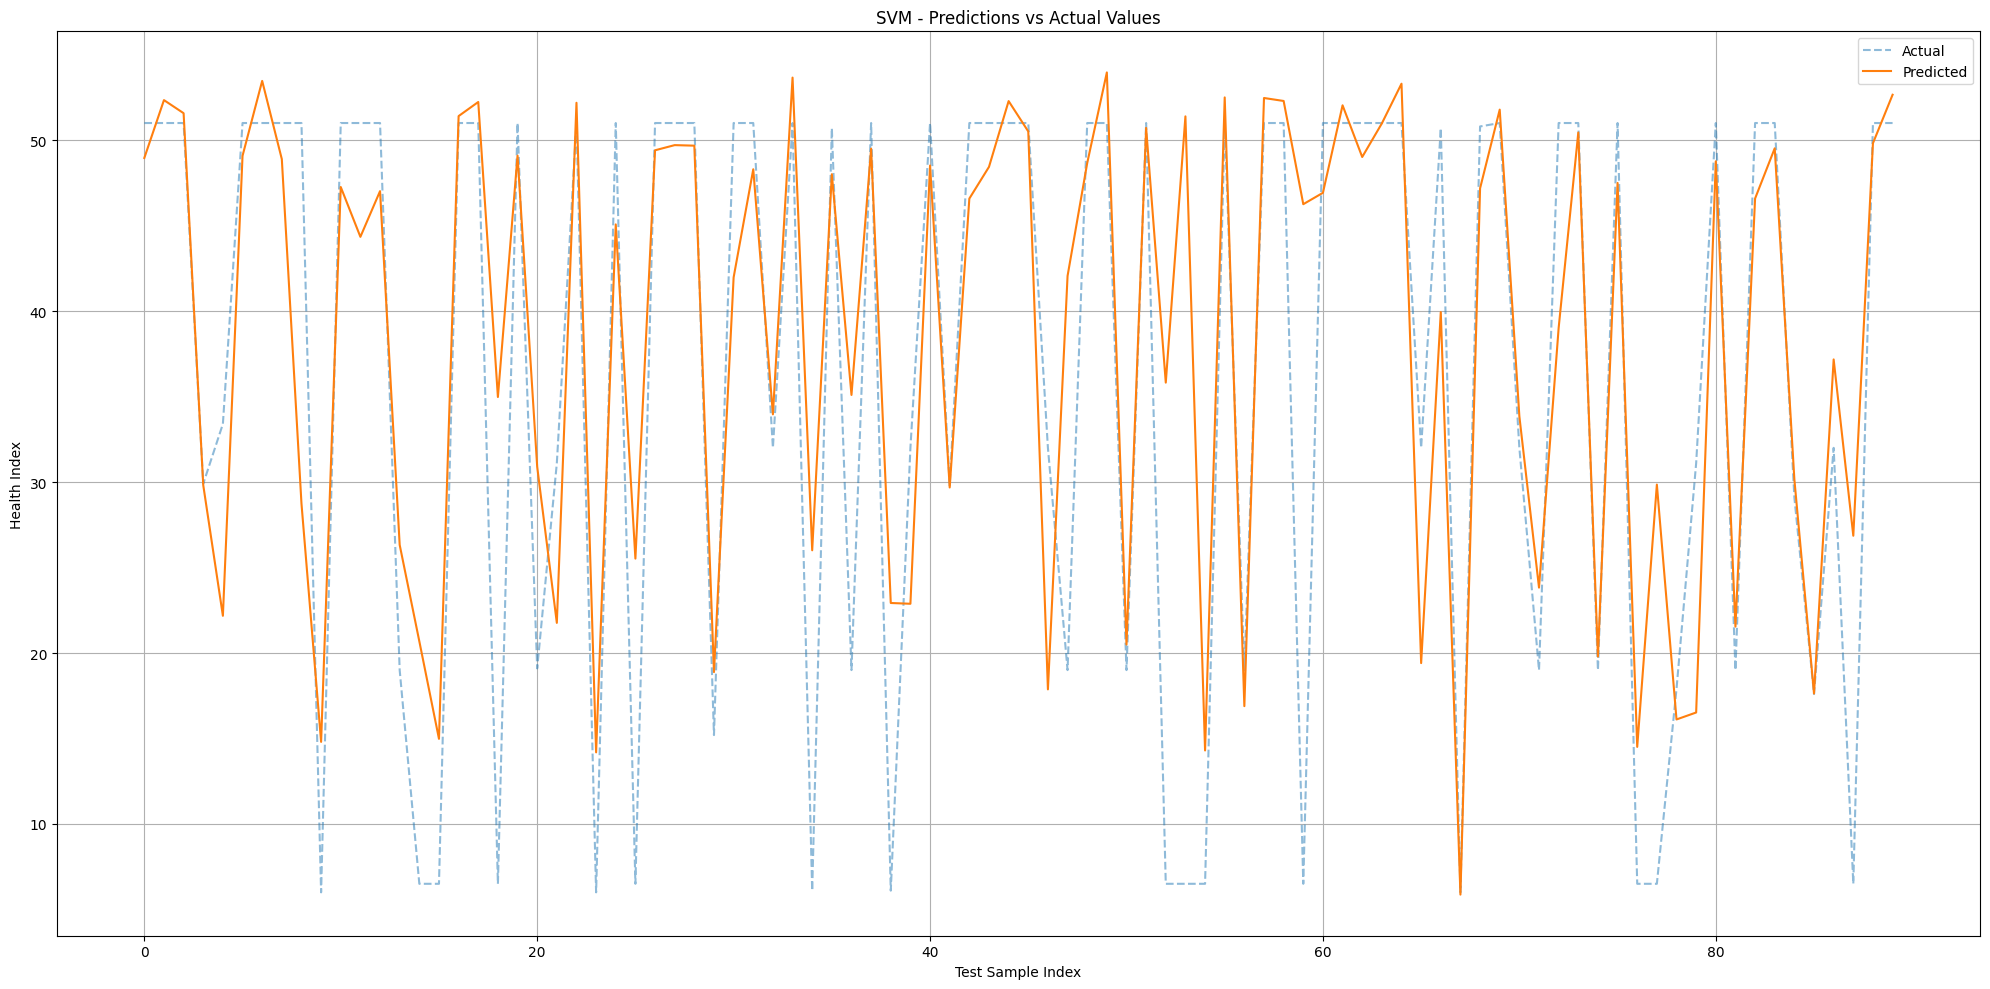

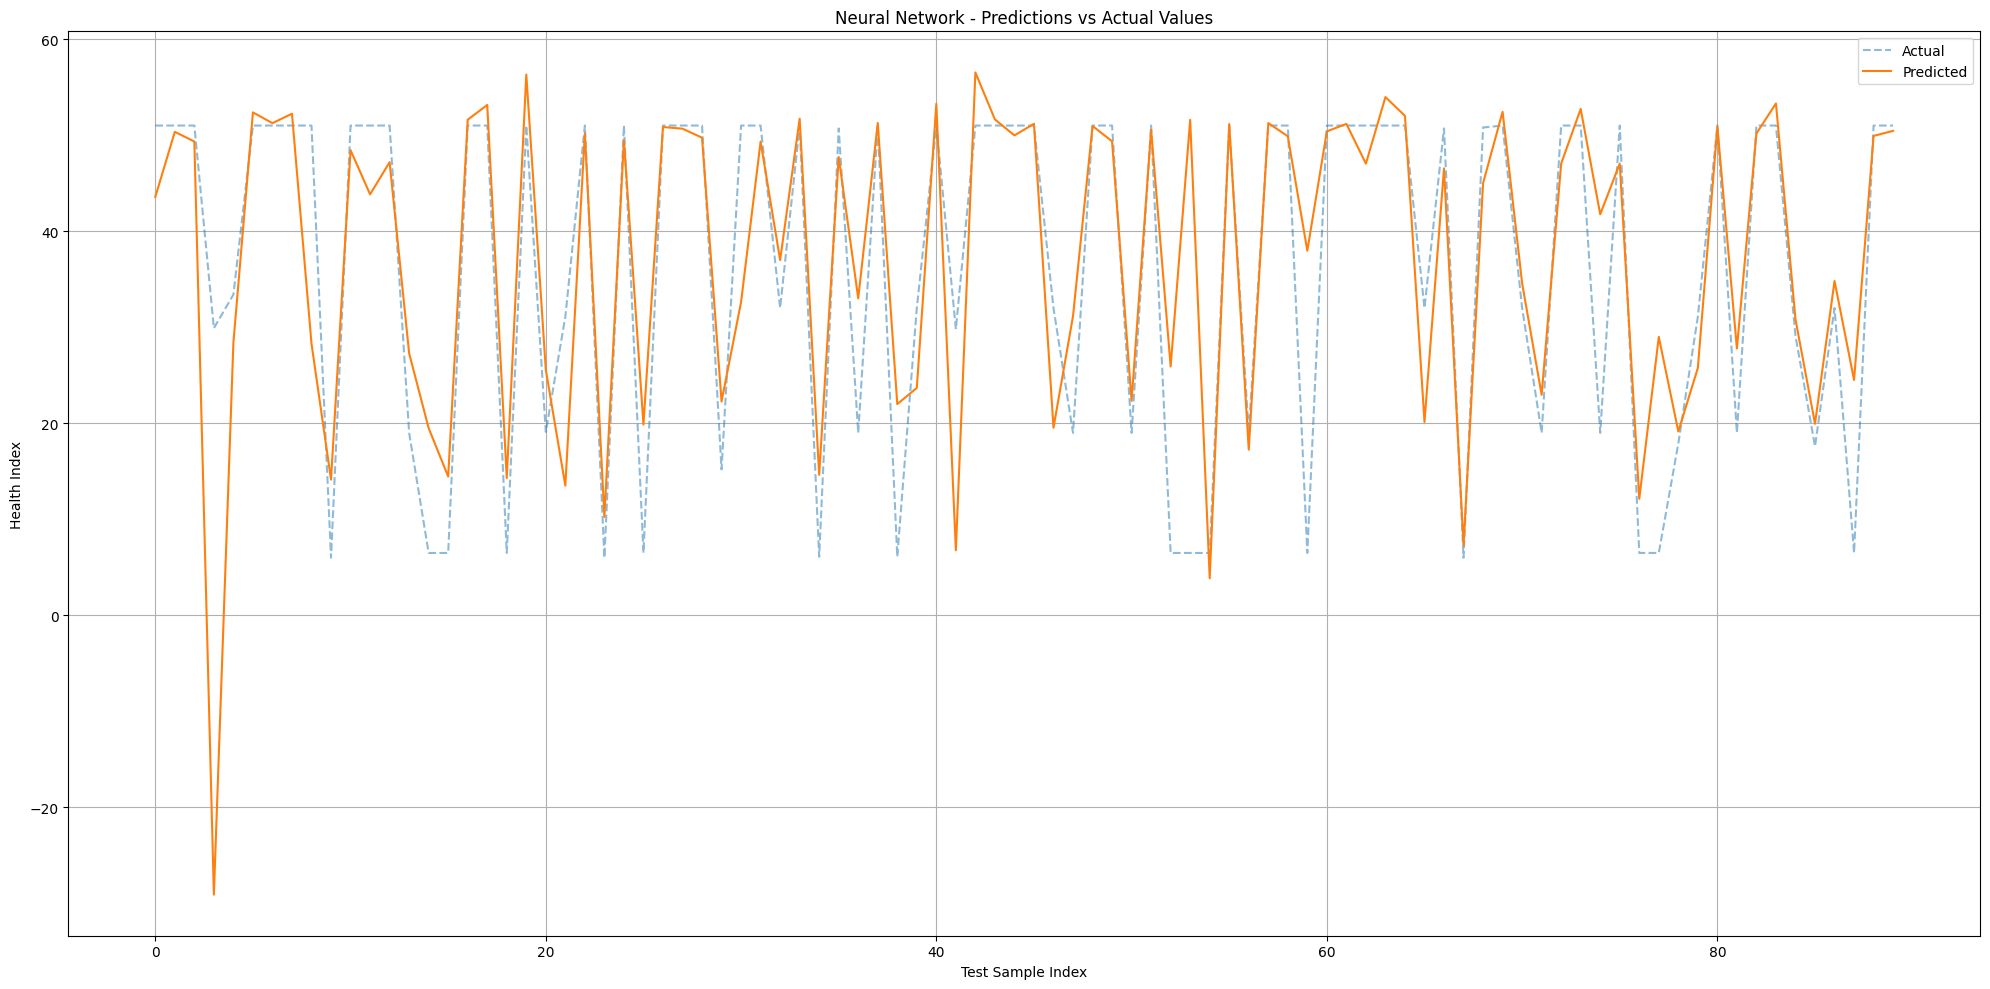

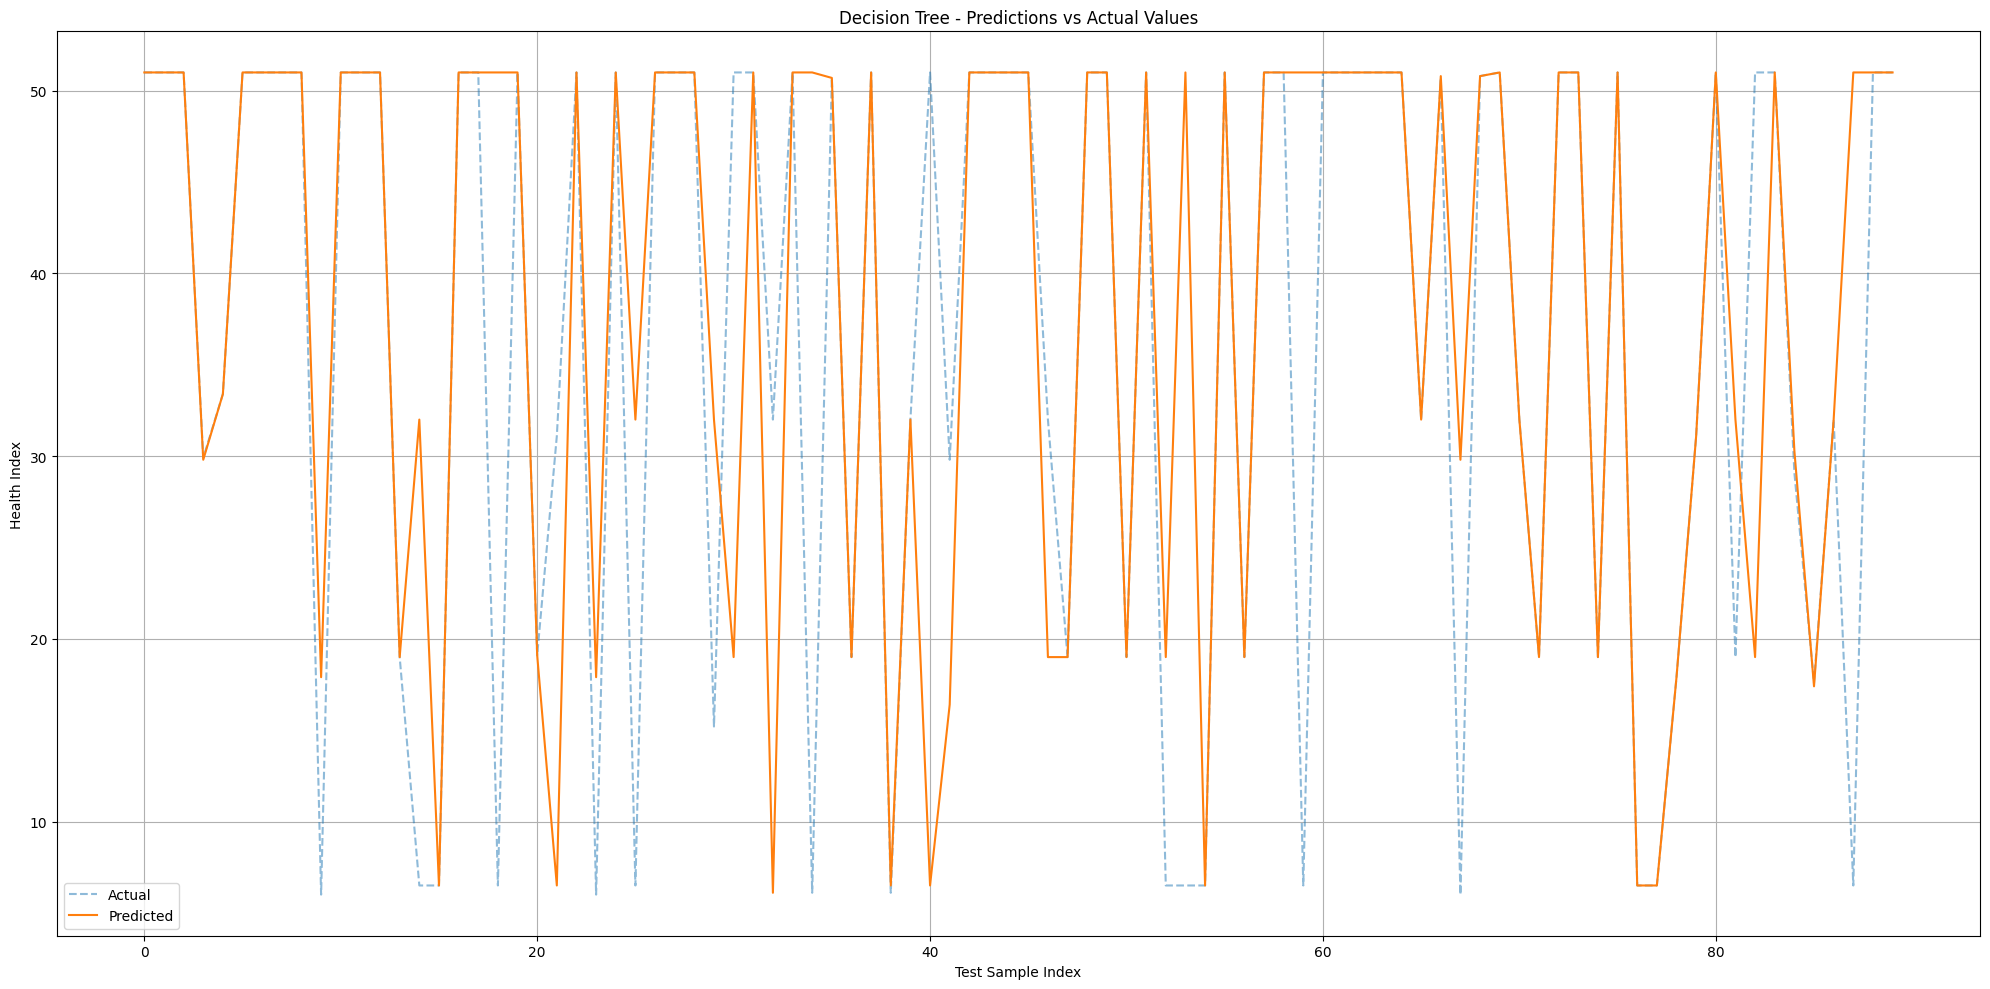

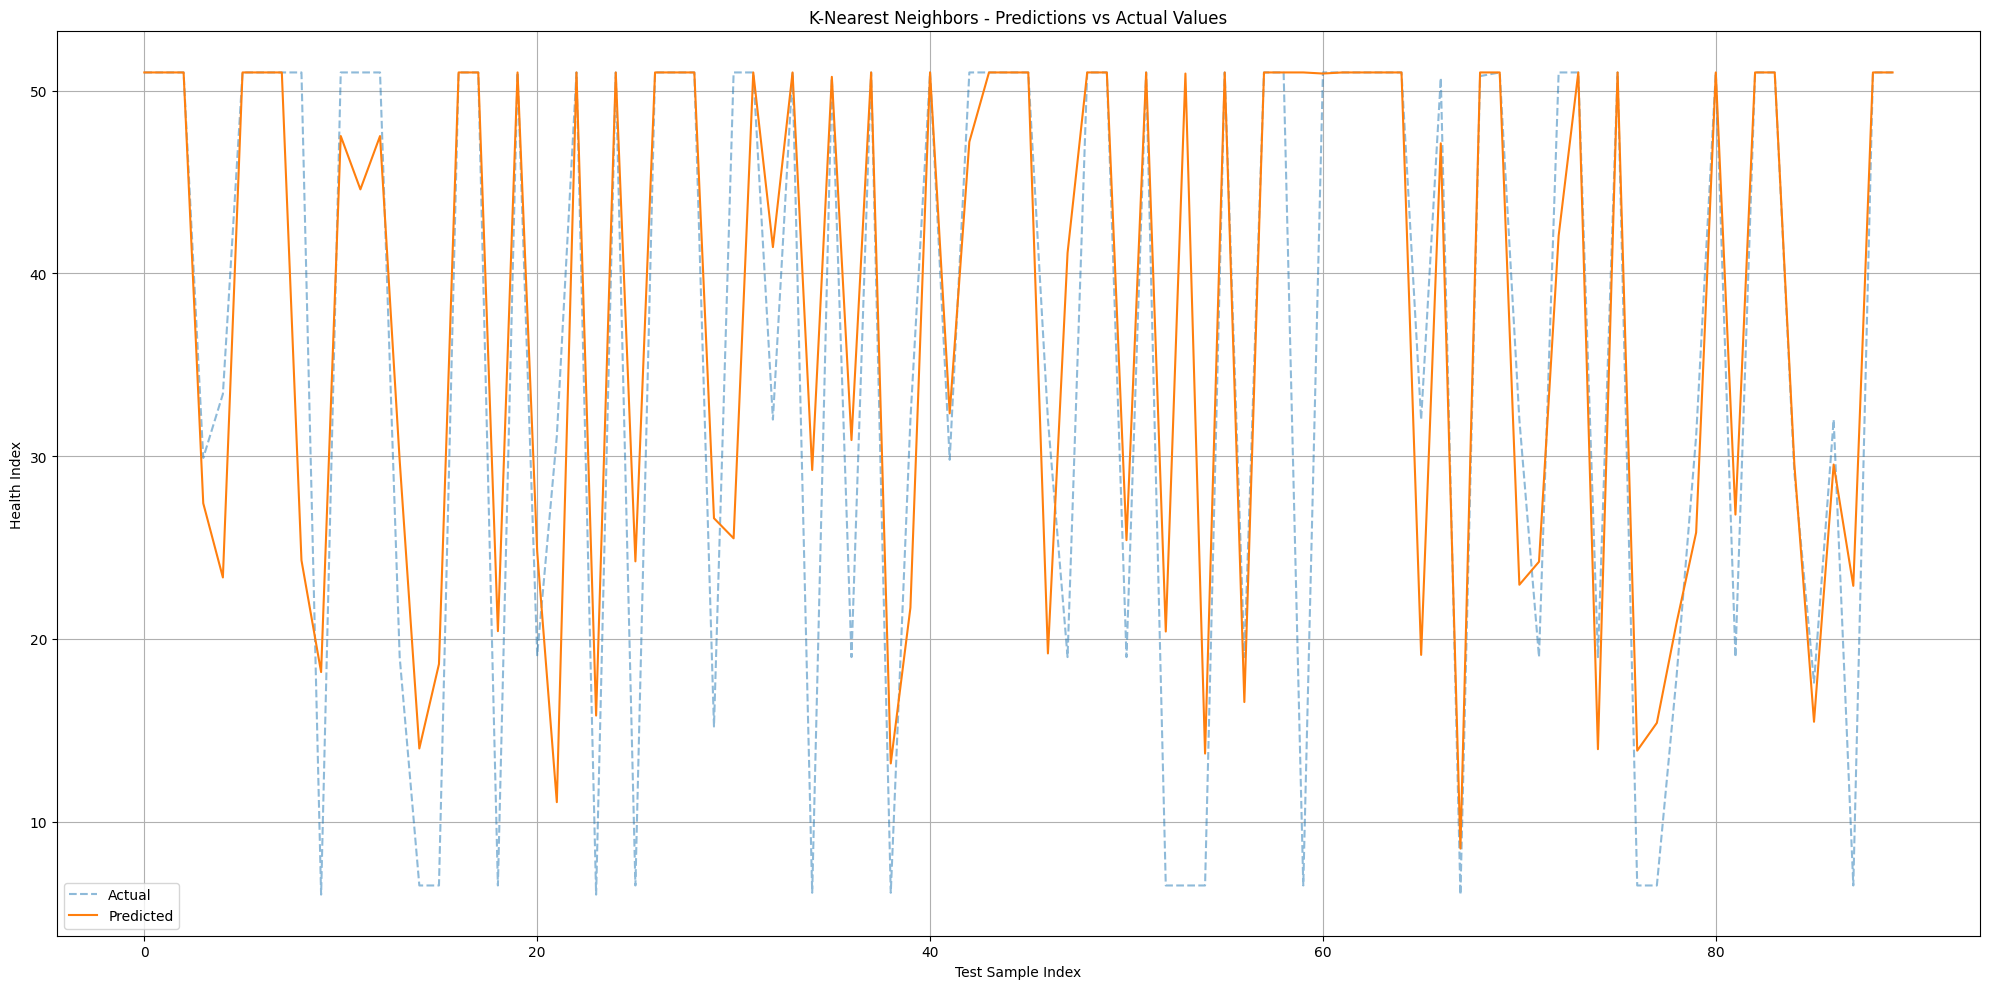

In [30]:
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(x1_test)
    # Convert predictions and actual values back to original scale
    y_pred_original = scaler2.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = scaler2.inverse_transform(y1_test)
    
    # Create a new figure for each model
    plt.figure(figsize=(20, 10))
    
    # Plot predictions vs actual values
    plt.plot(range(len(y_test_original)), y_test_original, label='Actual', linestyle='--', alpha=0.5)
    plt.plot(range(len(y_pred_original)), y_pred_original, label='Predicted')
    
    plt.xlabel('Test Sample Index')
    plt.ylabel('Health Index')
    plt.title(f'{name} - Predictions vs Actual Values')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [29]:
# Save all models to disk
import joblib
import os

# Create health_index directory if it doesn't exist
os.makedirs('life_expectation', exist_ok=True)

print("\nSaving models...")
for name, model in models.items():
    filename = f'life_expectation/{name.replace(" ", "_").lower()}.joblib'
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

# Save the scaler as well since we'll need it for predictions
joblib.dump(scaler2, 'life_expectation/scaler.joblib')
print("Saved scaler to life_expectation/scaler.joblib")


Saving models...
Saved Linear Regression to life_expectation/linear_regression.joblib
Saved Ridge Regression to life_expectation/ridge_regression.joblib
Saved Lasso Regression to life_expectation/lasso_regression.joblib
Saved ElasticNet to life_expectation/elasticnet.joblib
Saved Random Forest to life_expectation/random_forest.joblib
Saved Gradient Boosting to life_expectation/gradient_boosting.joblib
Saved AdaBoost to life_expectation/adaboost.joblib
Saved XGBoost to life_expectation/xgboost.joblib
Saved LightGBM to life_expectation/lightgbm.joblib
Saved SVM to life_expectation/svm.joblib
Saved Neural Network to life_expectation/neural_network.joblib
Saved Decision Tree to life_expectation/decision_tree.joblib
Saved K-Nearest Neighbors to life_expectation/k-nearest_neighbors.joblib
Saved scaler to life_expectation/scaler.joblib
